<a href="https://colab.research.google.com/github/JoDeMiro/DeepLearningIntroduction/blob/main/Fun_with_NeuralNet_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kis hülyeség - Part 2

Csak egy kis móka.

MLPRegression soronként oszloponkétn n neuronnal.

Az elöző részben:

Azt láttuk, hogy nagyon lassan tanulja ráadásul rosszul becsüli a képből vett sorokat, pedig ez egy könnyű feladat lenne.

Ezért két másik módszert vizsgálunk meg.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor

In [2]:
%%capture
!rm *.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png

In [3]:
import skimage.io
import skimage.transform

In [4]:
pic1 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

print(type(pic1))

print(pic1.shape)

red1   = pic1[:, :, 0]
green1 = pic1[:, :, 1]
blue1  = pic1[:, :, 2]

<class 'numpy.ndarray'>
(400, 610, 3)


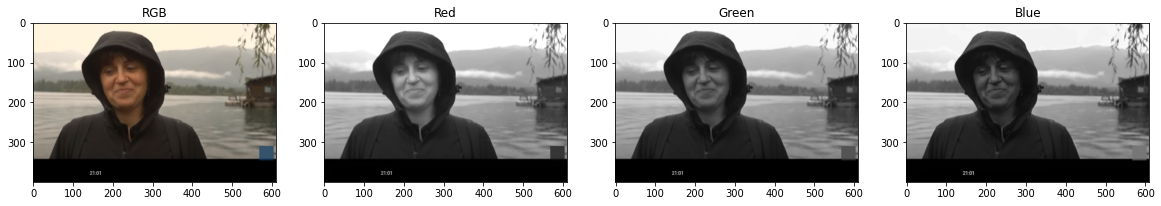

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic1, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red1, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green1, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue1, cmap='gray'); ax4.set_title('Blue')

plt.show()

In [6]:
pic2 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png')

print(type(pic2))

print(pic2.shape)

red2   = pic2[:, :, 0]
green2 = pic2[:, :, 1]
blue2  = pic2[:, :, 2]

<class 'numpy.ndarray'>
(400, 610, 3)


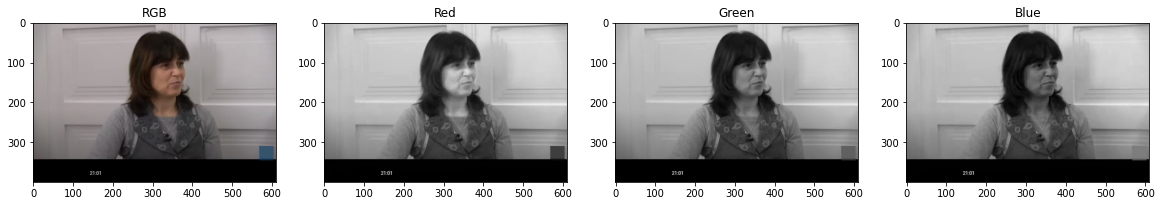

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic2, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red2, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green2, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue2, cmap='gray'); ax4.set_title('Blue')

plt.show()

In [8]:
def get_picture(file = 'https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png'):
  pic = skimage.io.imread(file)

  print(type(pic))
  print(pic.shape)

  red   = pic[:, :, 0]
  green = pic[:, :, 1]
  blue  = pic[:, :, 2]

  return pic, red, green, blue


def show_irgb(pic):
  red   = pic[:, :, 0]
  green = pic[:, :, 1]
  blue  = pic[:, :, 2]

  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

  ax1.imshow(pic, cmap='gray'); ax1.set_title('RGB')
  ax2.imshow(red, cmap='gray'); ax2.set_title('Red')
  ax3.imshow(green, cmap='gray'); ax3.set_title('Green')
  ax4.imshow(blue, cmap='gray'); ax4.set_title('Blue')

  plt.show()

def show_gray(pic):
  fig, (ax1) = plt.subplots(1, 1, figsize=(5, 8))

  ax1.imshow(pic, cmap='gray'); ax1.set_title('Gray')

  plt.show()

def crop_img(pic, x, y, w, h):
  red_   = pic[y:y+h, x:x+w, 0]
  green_ = pic[y:y+h, x:x+w, 1]
  blue_  = pic[y:y+h, x:x+w, 2]
  pic_   = pic[y:y+h, x:x+w, :]

  return pic_, red_, green_, blue_

def resize_img(pic, w, h):
  pic_ = skimage.transform.resize(pic, (w, h))

  red_   = pic_[:, :, 0]
  green_ = pic_[:, :, 1]
  blue_  = pic_[:, :, 2]

  return pic_, red_, green_, blue_

def to_gray_img(pic):

  grey_ = (pic[:, :, 0] + pic[:, :, 1] + pic[:, :, 0])/3

  return grey_


<class 'numpy.ndarray'>
(400, 610, 3)


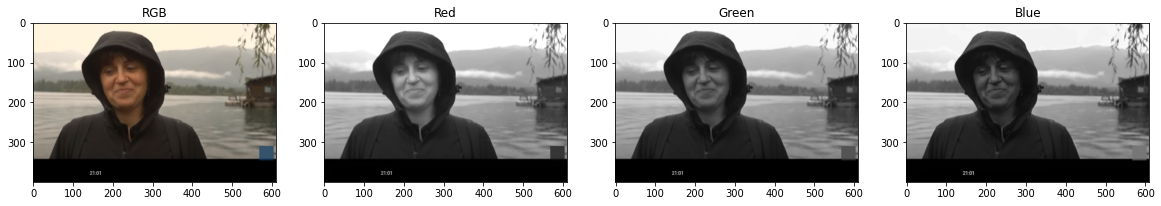

In [9]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

show_irgb(img)

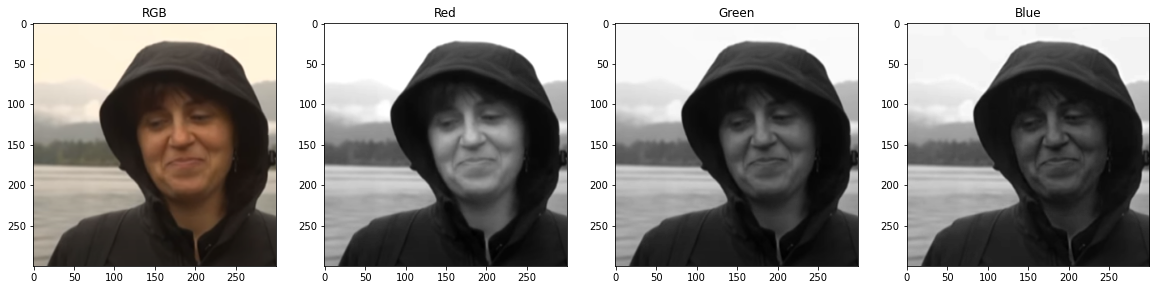

In [10]:
croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)

show_irgb(croped_img)


<class 'numpy.ndarray'>
(400, 610, 3)


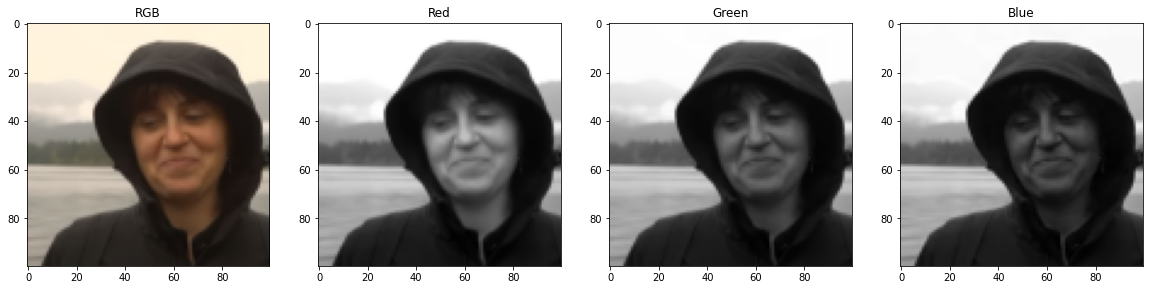

In [11]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

woman1 = resized_img

show_irgb(woman1)

<class 'numpy.ndarray'>
(400, 610, 3)


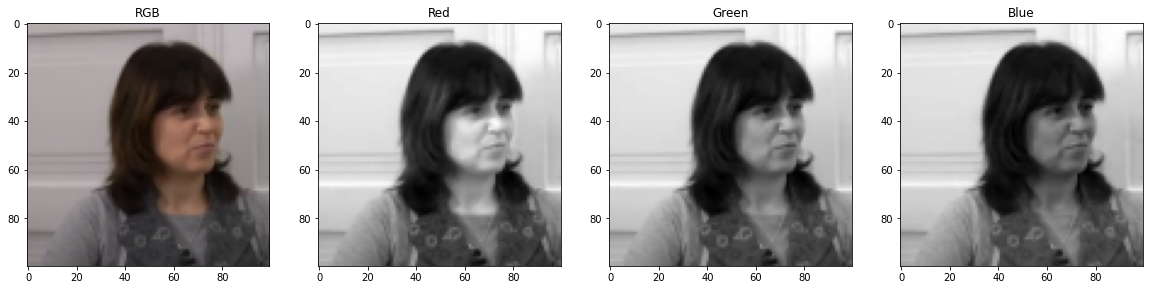

In [12]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png')

croped_img, _, _, _ = crop_img(img, 140, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

woman2 = resized_img

show_irgb(woman2)

<class 'numpy.ndarray'>
(400, 610, 3)


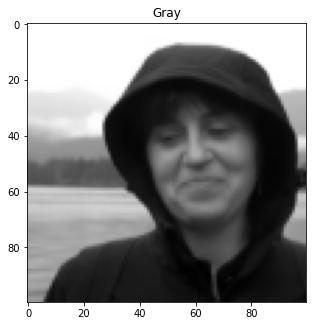

In [13]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

gray_img = to_gray_img(resized_img)

woman1 = gray_img

show_gray(woman1)

<class 'numpy.ndarray'>
(400, 610, 3)


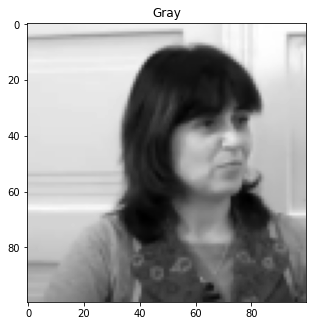

In [14]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png')

croped_img, _, _, _ = crop_img(img, 140, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

gray_img = to_gray_img(resized_img)

woman2 = gray_img

show_gray(woman2)

# Meg van a két képem, játék.

Menjünk végig a kép sorain, és mindegyikre csináljuk egy linreg, vagy MLPRegregression illesztést. Mentsük el a becslést.

In [15]:
# A kép
# woman1

img = woman1.copy()

print(img.shape)

rows = img.shape[0]
cols = img.shape[1]

_X_indicator = np.arange(0, 1, 1/cols)
print(_X_indicator.shape)

_X_indicator = _X_indicator.reshape(-1, 1)
print(_X_indicator.shape)


(100, 100)
(100,)
(100, 1)


In [16]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
mlp = MLPRegressor(hidden_layer_sizes=(10,20),
                   activation='tanh',
                   solver='lbfgs',                  # lbfgs sokkal gyorsabban konvergál mint az adam, viszont nincs neki loss_curve_ objektuma
                   batch_size=100,
                   learning_rate='constant',
                   learning_rate_init=0.001,
                   max_iter=17000,
                   shuffle=True,
                   random_state=1,
                   warm_start=False,
                   verbose=0,
                   validation_fraction=0.0,
                   n_iter_no_change=100000,
                   alpha=0.00000000000000001, tol=0.00000000000000001, early_stopping=True, epsilon=1e-30, max_fun=50000)


No handles with labels found to put in legend.


(2, 100)
(1, 100)
MSE =  0.0003953233207851125


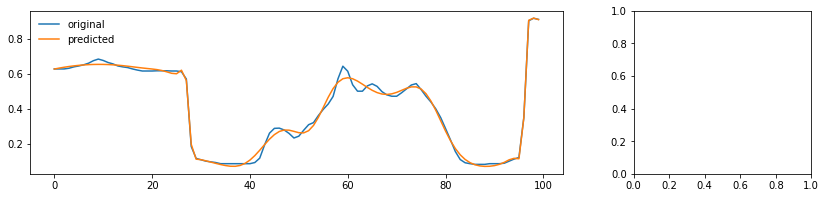

In [18]:
# Megvan a model, tanítsuk fel és kérjük le a súlyokat

# Nézzük meg elöször csak egy soron keresztül

_result = np.zeros((1, 100))

_y = img[42, :]

mlp.fit(_X_indicator, _y)
_predicted = mlp.predict(_X_indicator)
_result = np.vstack((_result, _predicted))
print(_result.shape)
_result = _result[1:, :]
print(_result.shape)
mse = mean_squared_error(_y, _predicted)
print('MSE = ', mse)

fig, (a0, a1) = plt.subplots(1, 2, figsize=(14, 3), gridspec_kw={'width_ratios': [3, 1]})
a0.plot(_y, label = 'original')
a0.plot(_predicted, label = 'predicted')
a0.legend(frameon=False)
# a1.plot(mlp.loss_curve_, label = 'loss')
a1.legend(frameon=False)
plt.show()


# A model súlyokat alapul véve csinálunk egy Evolúciós szelekciót

A helyzet az, hogy ha programban idáig eljutottunk akkor van egy nagyon jól feltanított hálónk.

Mérjük meg, hogy mennyire jó aztán butítsuk le, hogy GA-val tudjunk rajta tanulni.

In [19]:

from copy import deepcopy


In [20]:
mlp.set_params().max_iter=1

mlp.set_params()

MLPRegressor(activation='tanh', alpha=1e-17, batch_size=100,
             early_stopping=True, epsilon=1e-30, hidden_layer_sizes=(10, 20),
             max_fun=50000, max_iter=1, n_iter_no_change=100000, random_state=1,
             solver='lbfgs', tol=1e-17, validation_fraction=0.0, verbose=0)

score after sgd learning =  0.0003953233207851125
score after reset the net =  0.05238925670809315


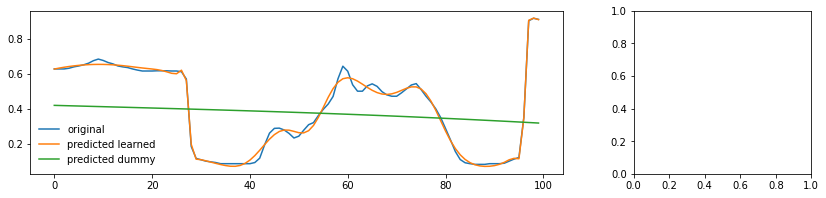

In [21]:
_pred0 = mlp.predict(_X_indicator)
_score0 = mean_squared_error(_y, _pred0)
print('score after sgd learning = ', _score0)

mlp_dummy = deepcopy(mlp)
mlp_dummy.set_params().max_iter=1
mlp_dummy.fit(_X_indicator, _y)
_pred1 = mlp_dummy.predict(_X_indicator)
_score1 = mean_squared_error(_y, _pred1)
print('score after reset the net = ', _score1)

fig, (a0, a1) = plt.subplots(1, 2, figsize=(14, 3), gridspec_kw={'width_ratios': [3, 1]})
a0.plot(_y, label = 'original')
a0.plot(_pred0, label = 'predicted learned')
a0.plot(_pred1, label = 'predicted dummy')
a0.legend(frameon=False)
# a1.plot(mlp.loss_curve_, label = 'loss')
# a1.legend(frameon=False)
plt.show()

In [22]:
coefs = mlp_dummy.coefs_

In [23]:
type(coefs)

list

In [24]:
len(coefs)

3

In [25]:
a = mlp_dummy.coefs_[0].copy()

a + np.random.randn(coefs[0].shape[0],coefs[0].shape[1])

array([[-0.35913831,  1.15775917, -1.07838547, -1.23531598,  1.05359078,
        -1.41998565, -0.84723287, -0.04726865,  0.8940267 , -2.00907809]])

In [26]:
# hogyan tudjuk szabályozni azt, hogy mennyire randomizálja a súlyokat

a0 = np.random.randn(coefs[0].shape[0],coefs[0].shape[1])
a1 = np.random.randn(coefs[0].shape[0],coefs[0].shape[1])
a2 = np.random.randn(coefs[0].shape[0],coefs[0].shape[1]) / 10
a3 = np.random.randn(coefs[0].shape[0],coefs[0].shape[1]) / 100

print(a0)
print(a1)
print(a2)
print(a3)


[[-0.37135904 -1.75595557  1.15277483  1.28917287 -1.19399983 -0.33694285
   0.01983702 -0.98057227  0.84890059 -0.27519055]]
[[ 0.77788232  0.42795592 -2.53108846 -1.92174366 -0.87192279  1.06726274
  -0.13924684 -0.97319109 -0.6500287   0.4237127 ]]
[[ 8.91371133e-02 -8.84081063e-03 -1.83222608e-01 -6.86682215e-05
   4.03515149e-02  1.59780996e-01 -1.72646517e-01 -1.22431288e-01
   1.85113893e-01 -4.53373972e-02]]
[[-0.01038955 -0.01280226  0.00396932 -0.0116937   0.009324   -0.01391162
  -0.00107446 -0.01070261  0.01349592 -0.00801095]]


In [27]:
# Jól műmödik az algoritmusunk mert nem változtat a súlyokon semmit ---< Test >----

def randomizer(coefs):
  _coefs = coefs.copy()
  for i in range(len(coefs)):
    # _coefs[i] = coefs[i] + np.random.randn(coefs[i].shape[0], coefs[i].shape[1])
    _coefs[i] = coefs[i]

  return _coefs

def evolve(mlp_dummy):
  coefs = mlp_dummy.coefs_

  backup_mlp = deepcopy(mlp_dummy)
  working_mlp = deepcopy(mlp_dummy)

  generation = 3
  population = 10

  for i in range(generation):
    # a legjobb egyed
    best_solution = None
    best_score = 999999
    for j in range(population):
      a = randomizer(coefs)
      # print(a)
      working_mlp.coefs_ = a

      # számolja ki a becslést
      pred = working_mlp.predict(_X_indicator)

      # mérje vissza a hibát
      score = mean_squared_error(_y, pred)
      print('i = ', i, 'j = ', j, 'score = ', score)

      # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
      if( score < best_score ):
        best_score = score
        best_solution = deepcopy(working_mlp)
        # print('new best_solution find individual = ', j)

      # ha megvan a legjobb akkor azt tegye le a coefs változóba

    print('best_score in generation i = ', i, ' = ', best_score)


In [28]:
evolve(mlp)

i =  0 j =  0 score =  0.0003953233207851125
i =  0 j =  1 score =  0.0003953233207851125
i =  0 j =  2 score =  0.0003953233207851125
i =  0 j =  3 score =  0.0003953233207851125
i =  0 j =  4 score =  0.0003953233207851125
i =  0 j =  5 score =  0.0003953233207851125
i =  0 j =  6 score =  0.0003953233207851125
i =  0 j =  7 score =  0.0003953233207851125
i =  0 j =  8 score =  0.0003953233207851125
i =  0 j =  9 score =  0.0003953233207851125
best_score in generation i =  0  =  0.0003953233207851125
i =  1 j =  0 score =  0.0003953233207851125
i =  1 j =  1 score =  0.0003953233207851125
i =  1 j =  2 score =  0.0003953233207851125
i =  1 j =  3 score =  0.0003953233207851125
i =  1 j =  4 score =  0.0003953233207851125
i =  1 j =  5 score =  0.0003953233207851125
i =  1 j =  6 score =  0.0003953233207851125
i =  1 j =  7 score =  0.0003953233207851125
i =  1 j =  8 score =  0.0003953233207851125
i =  1 j =  9 score =  0.0003953233207851125
best_score in generation i =  1  =  0.0003

In [29]:
# Nagyon kicsit változtatok a súlyokon a generációkon belül, de generációnként nincs öröklés

def randomizer(coefs):
  _coefs = coefs.copy()
  for i in range(len(coefs)):
    _ranodm_stregth = 100 # ----> nincs bekötve, majd megy a nevezőbe
    _random_disturbance = np.random.randn(coefs[i].shape[0], coefs[i].shape[1]) / 1000
    _coefs[i] = coefs[i] + _random_disturbance
    # _coefs[i] = coefs[i] # <--- means no change

  return _coefs

def evolve(mlp_dummy):
  coefs = mlp_dummy.coefs_

  backup_mlp = deepcopy(mlp_dummy)
  working_mlp = deepcopy(mlp_dummy)

  generation = 3
  population = 10

  for i in range(generation):
    # a legjobb egyed
    best_solution = None
    best_score = 999999
    for j in range(population):
      a = randomizer(coefs)
      # print(a)
      working_mlp.coefs_ = a

      # számolja ki a becslést
      pred = working_mlp.predict(_X_indicator)

      # mérje vissza a hibát
      score = mean_squared_error(_y, pred)
      print('i = ', i, 'j = ', j, 'score = ', score)

      # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
      if( score < best_score ):
        best_score = score
        best_solution = deepcopy(working_mlp)
        # print('new best_solution find individual = ', j)

      # ha megvan a legjobb akkor azt tegye le a coefs változóba

    print('best_score in generation i = ', i, ' = ', best_score)


In [30]:
evolve(mlp)

i =  0 j =  0 score =  0.00040913394330935993
i =  0 j =  1 score =  0.000567919556391911
i =  0 j =  2 score =  0.00044269067798473083
i =  0 j =  3 score =  0.0004078280741303606
i =  0 j =  4 score =  0.0005454249425563425
i =  0 j =  5 score =  0.0004346482453691569
i =  0 j =  6 score =  0.00044506719628560273
i =  0 j =  7 score =  0.0005048345370240056
i =  0 j =  8 score =  0.0004892731952972449
i =  0 j =  9 score =  0.0005955025741095957
best_score in generation i =  0  =  0.0004078280741303606
i =  1 j =  0 score =  0.00047812728865029536
i =  1 j =  1 score =  0.0005194922164656822
i =  1 j =  2 score =  0.0004075519476972701
i =  1 j =  3 score =  0.0004282105886028962
i =  1 j =  4 score =  0.000424665712037709
i =  1 j =  5 score =  0.0004037594230020626
i =  1 j =  6 score =  0.0005532368019712353
i =  1 j =  7 score =  0.00040250610580012925
i =  1 j =  8 score =  0.000406007409757347
i =  1 j =  9 score =  0.00042537800366322903
best_score in generation i =  1  =  0.0

In [31]:
0.0003953233207851125

# Ehhez képest csak romlott

# Ennek az egyik oka, hogy tulajdonképpen az összes súlyon módosítok

0.0003953233207851125

In [32]:
# Nézzük meg, hogy a dummy mlp resetelt súlyó modellen milyen eredményeket adna.


_pred_dummy = mlp_dummy.predict(_X_indicator)
_score_dummy = mean_squared_error(_y, _pred_dummy)
print('score dummy net = ', _score_dummy)

score dummy net =  0.05238925670809315


In [33]:
# Ehhez képest kéne elérni valami javulást a randomizációval

In [34]:
evolve(mlp_dummy)

i =  0 j =  0 score =  0.0523673226302559
i =  0 j =  1 score =  0.05238155542811529
i =  0 j =  2 score =  0.05244330250412998
i =  0 j =  3 score =  0.05234050055442153
i =  0 j =  4 score =  0.05232274369105682
i =  0 j =  5 score =  0.0524497073188965
i =  0 j =  6 score =  0.05235644275140294
i =  0 j =  7 score =  0.05240953769030333
i =  0 j =  8 score =  0.05232313647014965
i =  0 j =  9 score =  0.052169767675866875
best_score in generation i =  0  =  0.052169767675866875
i =  1 j =  0 score =  0.0523803081129933
i =  1 j =  1 score =  0.05243147627183908
i =  1 j =  2 score =  0.05226593040913548
i =  1 j =  3 score =  0.05233377222898663
i =  1 j =  4 score =  0.05226888180574882
i =  1 j =  5 score =  0.05248072423561997
i =  1 j =  6 score =  0.052400574452028524
i =  1 j =  7 score =  0.05245005101739588
i =  1 j =  8 score =  0.05231333913643685
i =  1 j =  9 score =  0.05227869012368348
best_score in generation i =  1  =  0.05226593040913548
i =  2 j =  0 score =  0.052

In [35]:
# rendben úgy látszik, hogy a randomizációval sikerül úgy modosítani a súlyokat, hogy néha jobb eredményt kapjunk

# írjuk tovább az evolve függvényt, hogy generációról generációra örökítse át a legjobb modelt és azokat randomizálja




In [36]:
# Nagyon kicsit változtatok a súlyokon a generációkon belül, de generációnként nincs öröklés

def randomizer(coefs, random_factor):
  _coefs = coefs.copy()
  for i in range(len(coefs)):
    _ranodm_stregth = 100 # ----> nincs bekötve, majd megy a nevezőbe
    _random_disturbance = np.random.randn(coefs[i].shape[0], coefs[i].shape[1]) / random_factor
    _coefs[i] = coefs[i] + _random_disturbance
    # _coefs[i] = coefs[i] # <--- means no change

  return _coefs

def evolve_adv1(mlp_dummy, generation = 10, population = 10, print_population = True, print_generation = (True, 1), random_factor = 1000):
  coefs = mlp_dummy.coefs_

  backup_mlp = deepcopy(mlp_dummy)
  working_mlp = deepcopy(mlp_dummy)

  generation = generation
  population = population

  best_mlp_solution = deepcopy(mlp_dummy)

  generation_holder = []
  population_holder = []
  best_indiv_holder = []
  best_score_holder = []

  for i in range(generation):

    population_holder = []
    best_indiv_holder = []
    # a legjobb egyed
    # best_mlp_solution = None # --> nem itt kel inicializálni
    best_score = 999999
    for j in range(population):
      coefs = best_mlp_solution.coefs_ # --> megkapja az éppen legjobb coeficienseit
      a = randomizer(coefs, random_factor)            # --> randomizálja a súlyokat
      # print(a)
      working_mlp.coefs_ = a           # --> hozzárendeljük a randomizált súlyokat a hálóhoz

      # számolja ki a becslést
      pred = working_mlp.predict(_X_indicator)

      # mérje vissza a hibát
      score = mean_squared_error(_y, pred)
      if( print_population ):
        print('i = ', i, 'j = ', j, 'score = ', score)

      # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
      if( score < best_score ):
        best_score = score
        best_mlp_solution = deepcopy(working_mlp)
        # print('new best_solution find individual = ', j)
      
      # az éppen aktuális egyed score értékét tegyük el
      population_holder.append(score)

      # -----

    # generációnként tároljuk le a legjobb egyed score érétkét
    best_score_holder.append(best_score)

    # nyomonkövetés céljából tegyük le egy adott generáció összes egyedének scorját is
    generation_holder.append(population_holder)

    if( print_generation[0] ):
      if( i % print_generation[1] == 0 ):
        print('best_score in generation i = ', i, ' = ', best_score)

  return generation_holder, best_score_holder, best_mlp_solution


In [37]:
generation_scores, best_scores, _ = evolve_adv1(mlp_dummy, generation = 20, print_population=False)

best_score in generation i =  0  =  0.05214357403077792
best_score in generation i =  1  =  0.05196896897554882
best_score in generation i =  2  =  0.05183201250016268
best_score in generation i =  3  =  0.05173305594310202
best_score in generation i =  4  =  0.05150100431077775
best_score in generation i =  5  =  0.05144917306229492
best_score in generation i =  6  =  0.051350559176367064
best_score in generation i =  7  =  0.05112339136352371
best_score in generation i =  8  =  0.05098082059787333
best_score in generation i =  9  =  0.05087854294339042
best_score in generation i =  10  =  0.05075486345981694
best_score in generation i =  11  =  0.050539909366452876
best_score in generation i =  12  =  0.050358717130883635
best_score in generation i =  13  =  0.050274139587250605
best_score in generation i =  14  =  0.05015988640625767
best_score in generation i =  15  =  0.0500697394566161
best_score in generation i =  16  =  0.04989703272618898
best_score in generation i =  17  =  0

In [38]:

def plot_generation_scatter(generation_scores):

  m = np.zeros((len(generation_scores), len(generation_scores[0])))
  # print(m.shape)

  for i in range(len(generation_scores)):
    for j in range(len(generation_scores[i])):
      m[i, j] = generation_scores[i][j]

  # --- kell csinálni egy [0, 1, 2, ..., 0, 1, 2, ..., 0, 1, 2] vektort is az lesz majd az x -tengely
  n = np.arange(1, len(generation_scores) + 1, 1)
  a = []
  for _ in range(len(generation_scores[0])):
    a.append(n)
  b = np.array(a)
  c = b.flatten()

  # --- ki kell teríteni a mátrixba rakott score-okat és kész is
  s = m.flatten(order='C')
  s = m.flatten(order='F')

  # --- plot
  # plt.scatter(c, s)
  
  return c, s

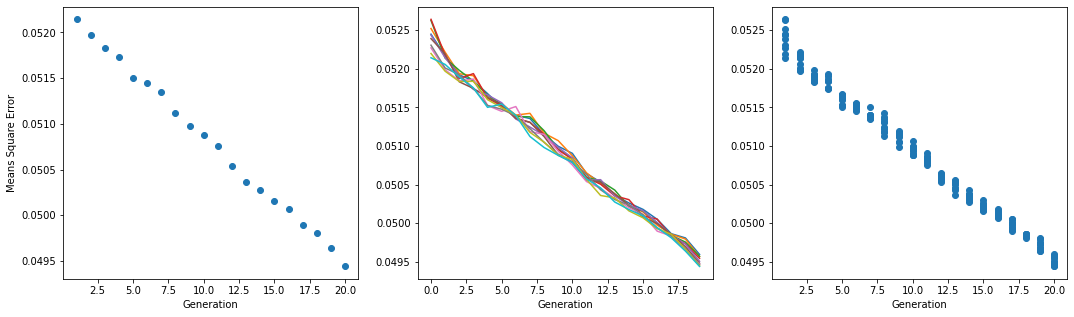

In [39]:
fig, (a0, a1, a2) = plt.subplots(1, 3, figsize=(18, 5))
_number_of_generation = len(best_scores)
_x_axis = np.arange(1, _number_of_generation+1, 1)
a0.scatter(_x_axis, best_scores)
a0.set_ylabel('Means Square Error')
a0.set_xlabel('Generation')

a1.plot(generation_scores)
a1.set_xlabel('Generation')

c, s = plot_generation_scatter(generation_scores)

a2.scatter(c, s)
a2.set_xlabel('Generation')
plt.show()

# Na akkor most egyben az egész, mert ez így nagyon sok

In [40]:
%%time
generation_scores, best_scores, best_mlp = evolve_adv1(mlp_dummy,
                                                       generation = 5000,
                                                       print_population=False,
                                                       print_generation=(True, 500))

best_score in generation i =  0  =  0.05181978458850036
best_score in generation i =  500  =  0.04431014401018436
best_score in generation i =  1000  =  0.04177128549098967
best_score in generation i =  1500  =  0.04128959927462957
best_score in generation i =  2000  =  0.0407564459517458
best_score in generation i =  2500  =  0.03969739154919262
best_score in generation i =  3000  =  0.03669213283409711
best_score in generation i =  3500  =  0.031845531282292186
best_score in generation i =  4000  =  0.02960084973760023
best_score in generation i =  4500  =  0.0287608039556845
CPU times: user 39.6 s, sys: 192 ms, total: 39.8 s
Wall time: 42.9 s


## Ezt a 3 Plotter meg tegyük ki egy függvénybe

In [41]:
def plot(generation_scores, best_scores, order = 'col'):
  '''
  generation_scores, best_scores
  '''

  if( order == 'col' ):
    fig, (a0, a1, a2) = plt.subplots(1, 3, figsize=(18, 5))
  if( order == 'row' ):
    fig, (a0, a1, a2) = plt.subplots(3, 1, figsize=(18, 15))

  _number_of_generation = len(best_scores)
  _x_axis = np.arange(1, _number_of_generation+1, 1)
  a0.scatter(_x_axis, best_scores)
  a0.set_ylabel('Means Square Error')
  a0.set_xlabel('Generation Best')


  a1.plot(generation_scores)
  a1.set_xlabel('Generation all')

  c, s = plot_generation_scatter(generation_scores)

  a2.scatter(c, s)
  a2.set_xlabel('Generation all')
  plt.show()


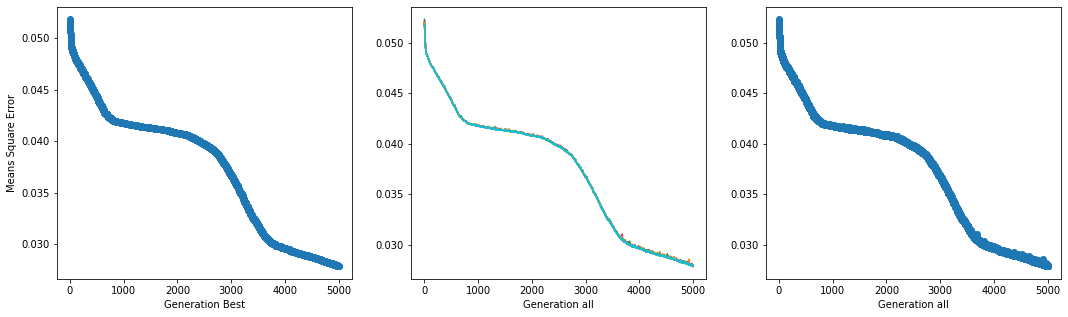

In [42]:
plot(generation_scores, best_scores)

In [241]:
def plot_two(mlp_original, mlp_evolved):
  _pred0 = mlp.predict(_X_indicator)                        # Az eredeti SGD() feltanított mlp
  _score0 = mean_squared_error(_y, _pred0)
  print('score after sgd learning = ', _score0)

  mlp_dummy = deepcopy(mlp)                                 # A sík hülye dummy mlp
  mlp_dummy.set_params().max_iter=1
  mlp_dummy.fit(_X_indicator, _y)
  _pred1 = mlp_dummy.predict(_X_indicator)
  _score1 = mean_squared_error(_y, _pred1)
  print('score after reset the net = ', _score1)

  _pred2 = mlp_evolved.predict(_X_indicator)
  _score2 = mean_squared_error(_y, _pred2)
  print('score after evolve the net = ', _score2)

  fig, (a0) = plt.subplots(1, 1, figsize=(9.5, 3))
  a0.plot(_y, label = 'original')
  a0.plot(_pred0, label = 'predicted learned')
  a0.plot(_pred1, label = 'predicted dummy')
  a0.plot(_pred2, label = 'predicted evolved')
  a0.legend(frameon=False)
  plt.show()


score after sgd learning =  0.0003953233207851125
score after reset the net =  0.05238925670809315
score after evolve the net =  0.027831704999764756


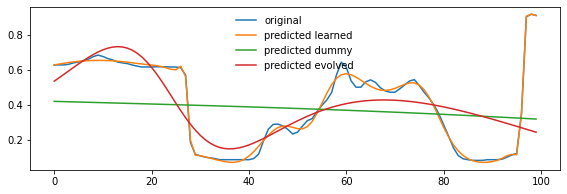

In [44]:
plot_two(mlp, best_mlp)

# Ez eddig tetszik

Most játszok egy kicsit a súlyokat variáló random beállításaival

In [45]:
%%time
generation_scores, best_scores, best_mlp = evolve_adv1(mlp_dummy,
                                                       generation = 5000,
                                                       print_population=False,
                                                       print_generation=(True, 500), random_factor=100)

best_score in generation i =  0  =  0.051298550592763295
best_score in generation i =  500  =  0.04223673532149186
best_score in generation i =  1000  =  0.0410905658431723
best_score in generation i =  1500  =  0.04186708667729287
best_score in generation i =  2000  =  0.04235006406127415
best_score in generation i =  2500  =  0.04128607427667414
best_score in generation i =  3000  =  0.03587207436662996
best_score in generation i =  3500  =  0.03304591031864153
best_score in generation i =  4000  =  0.029344349116444502
best_score in generation i =  4500  =  0.02001815793294212
CPU times: user 29.9 s, sys: 154 ms, total: 30 s
Wall time: 30 s


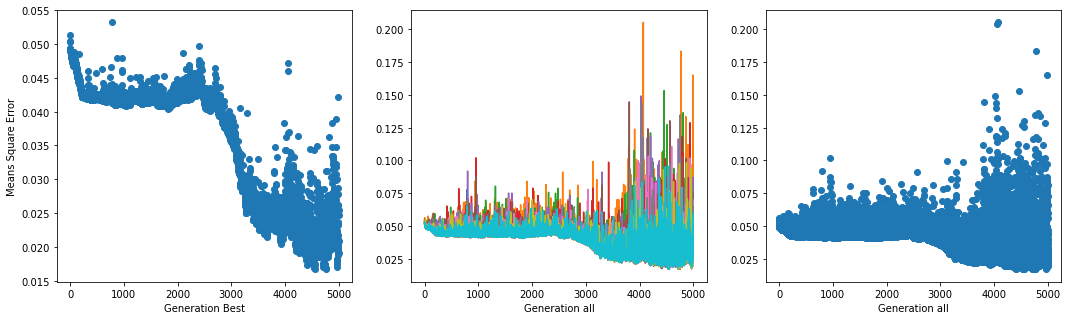

In [46]:
plot(generation_scores, best_scores)

# Fent

Amit itt látni kell vagy látni érdemes,

Hogy mivel nem volt **keep the best** tehát nem tartjuk meg a generáció legjobbját.

Ezért előfordulhat, hogy **mutáció** vagy randomizálás után az új populációban nem lesz olyan megoldás ami jobb mint a régebbi populáció, sőt még az is lehet, hogy rosszabb értéket kapunk.

Tulajdonképpen ezt látjuk a bal oldali ábrán.

Érdkes módon viszont így is konvergál és halad az egyre jobb megoldások felé, csak elég nagy szóródással.

A jobb oldali ábrán viszont az látszik, hogy egyre nagyobb a szóródás egy egy generációban a populáció egyes tagjai között is idővel.

# Ez nagyon tetszik,

Csináljunk még néhány kíséletet a mutáció faktorának beállításaival.



```
# További ötleteim egyébként

# - Néha tanuljon rá a gradiens módszerre, azátn ismét GA módba váltson át

# - Tartsa meg a legjobbat

# - Tartsa meg a legjobbat és ne minden súlyt változtasson hanem véletleszerűen egy bizonyos mennyiséget

# - Tartsa meg a legjobbat és néha változtasson a mutáció mértékén 'random_factor'
```


# Szorakozok még egy kicsit a beállításokkal.

Aztán továbblépünk...

In [47]:
%%time
generation_scores, best_scores, best_mlp = evolve_adv1(mlp_dummy,
                                                       generation = 5000,
                                                       print_population=False,
                                                       print_generation=(True, 500), random_factor=500)

best_score in generation i =  0  =  0.05175156311866446
best_score in generation i =  500  =  0.042263920403243366
best_score in generation i =  1000  =  0.04153370798804519
best_score in generation i =  1500  =  0.04093245099759669
best_score in generation i =  2000  =  0.03888501976653911
best_score in generation i =  2500  =  0.03385694671269137
best_score in generation i =  3000  =  0.030362813674248864
best_score in generation i =  3500  =  0.029688190977655866
best_score in generation i =  4000  =  0.02896203959649915
best_score in generation i =  4500  =  0.027715745105071722
CPU times: user 30.4 s, sys: 135 ms, total: 30.5 s
Wall time: 31.4 s


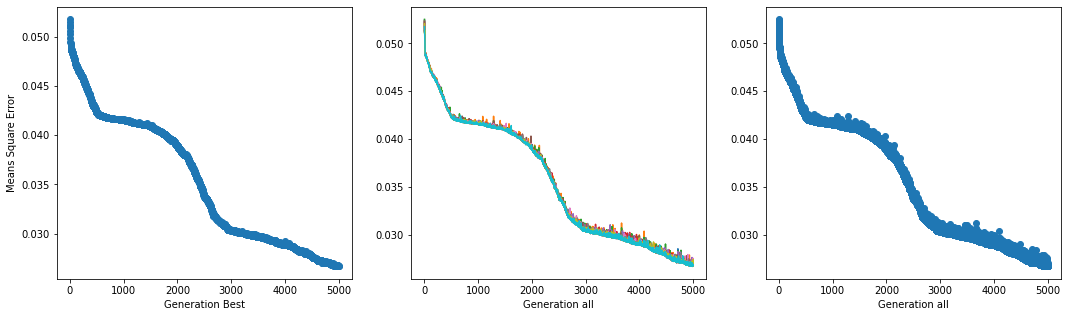

In [48]:
plot(generation_scores, best_scores)

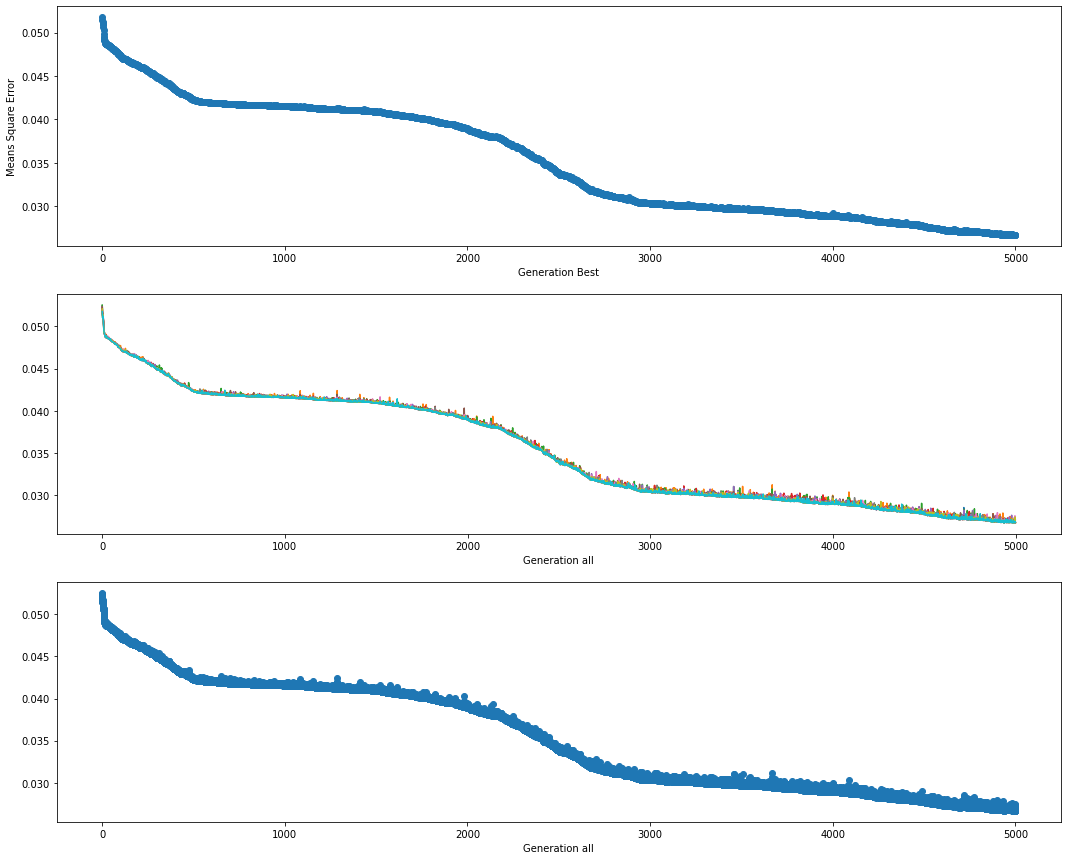

In [49]:
plot(generation_scores, best_scores, order='row')

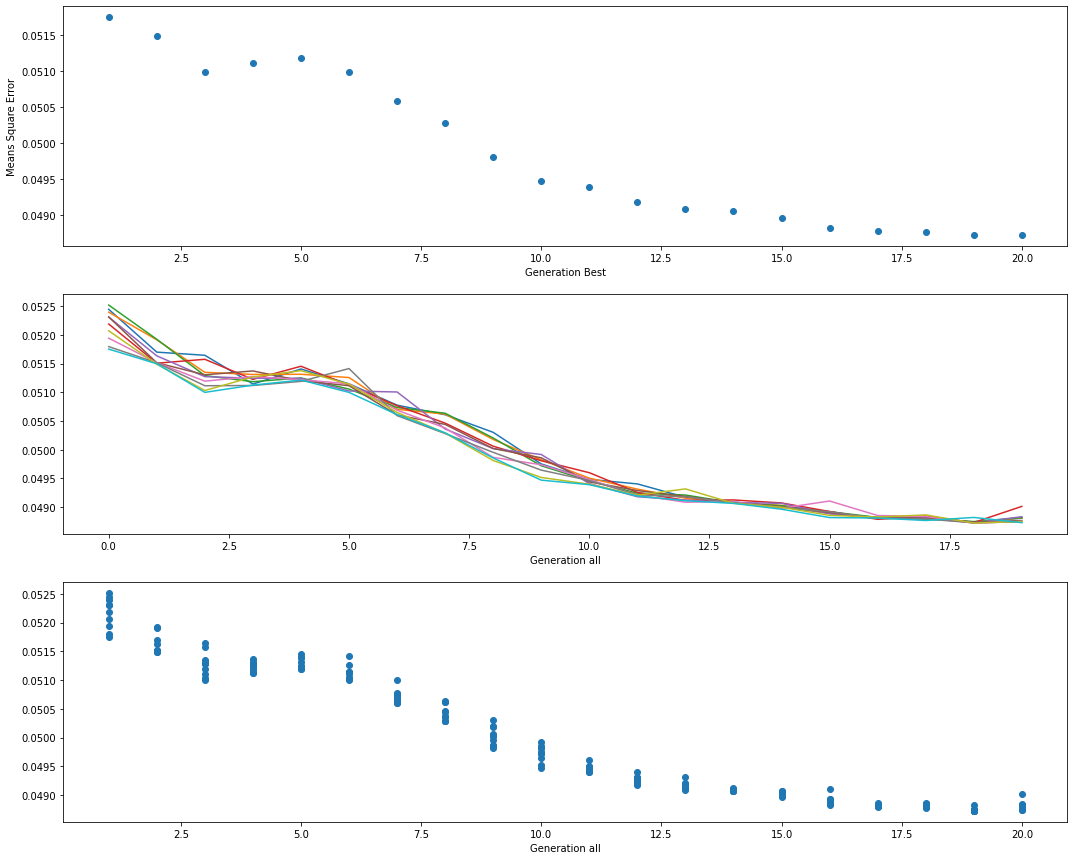

In [50]:
plot(generation_scores[0:20], best_scores[0:20], order='row')

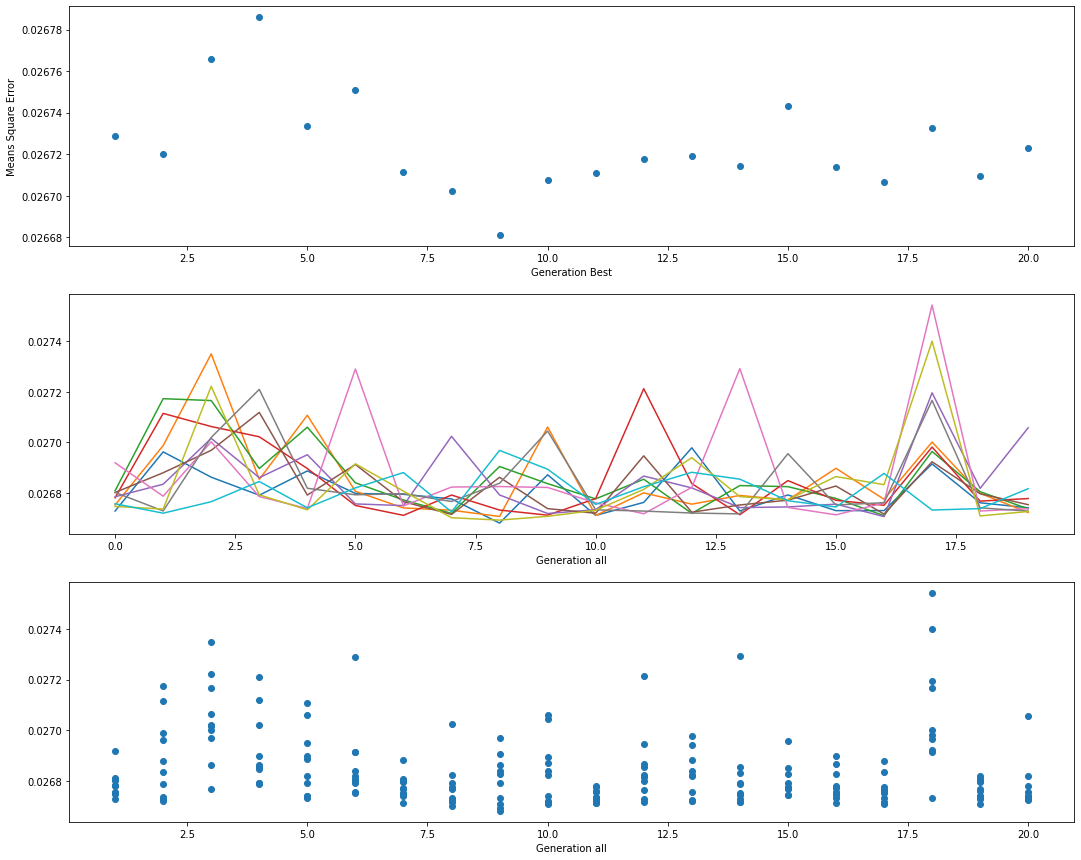

In [51]:
plot(generation_scores[-20:], best_scores[-20:], order='row')

# Fent

Ami látszik.

Az elejét **\[0:20\]** majd egy második lekérdezésben a végét **\[-20:\]** rajzoltattam csak ki.

A végén már nagyon ugrálnak az eredmények.

Ki kéne próbálni a **keep best** módszert is.

De elötte még hagyom, hogy jó sokáig fusson.

In [52]:
%%time
generation_scores, best_scores, best_mlp = evolve_adv1(mlp_dummy,
                                                       generation = 20000,
                                                       print_population=False,
                                                       print_generation=(True, 1000), random_factor=500)

best_score in generation i =  0  =  0.0519967137895062
best_score in generation i =  1000  =  0.0409913193866615
best_score in generation i =  2000  =  0.03615763792526063
best_score in generation i =  3000  =  0.029589900311903134
best_score in generation i =  4000  =  0.02811459311471435
best_score in generation i =  5000  =  0.02662900098159333
best_score in generation i =  6000  =  0.024994667177742107
best_score in generation i =  7000  =  0.024256718965363033
best_score in generation i =  8000  =  0.023948824141216397
best_score in generation i =  9000  =  0.023744704959992497
best_score in generation i =  10000  =  0.02352704826414212
best_score in generation i =  11000  =  0.023342785220267927
best_score in generation i =  12000  =  0.02290304999357099
best_score in generation i =  13000  =  0.022601118803648818
best_score in generation i =  14000  =  0.02187661931892228
best_score in generation i =  15000  =  0.021179792802409846
best_score in generation i =  16000  =  0.02061

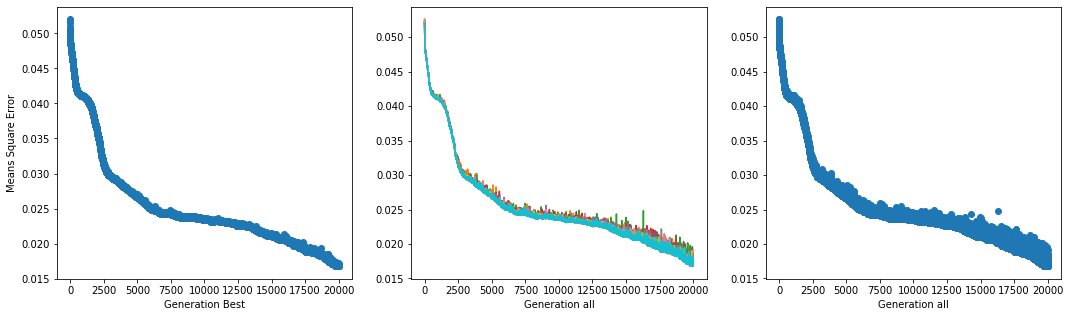

In [53]:
plot(generation_scores, best_scores)

# Irjuk meg Keep Best esetre is

Azóta ezt függvényt átírtam mert voltak vele alapvető problémák.

Ezekre leginkább akkor került sor, amikor változtattam rajta úgy, hogy a generáció egyes elemeiben ne az összes súlyt, hanem csak egy váletlenszerűen kiválaszott súlyt variáljon.

Ekkor derült ki, hogy van egy alapvető hiba a lenti kódban, amit két okból hagyok meg.

1. egyrészt érdekes, hogy így is képes evolválódni, sőt gyorsan evolválodik.
2. tanulság és emlékeztető, hogy példányosított objektum valamely propertijét ha elképrem akkor sem tudom copy() függvénnyel új példányba tenni.<br>
<br>
Ez most nekem még új Pythonban de nagyon megszívtam vele mire rájötem.

In [54]:
# Nagyon kicsit változtatok a súlyokon a generációkon belül, de generációnként nincs öröklés

def randomizer(coefs, random_factor):

  _coefs = coefs.copy()       # <--------------- nem úgy működik ahogy gondoltam, nem hoz létre új példányt hanem pointer
  
  for i in range(len(coefs)):
    _random_disturbance = np.random.randn(coefs[i].shape[0], coefs[i].shape[1]) / random_factor
    _coefs[i] = coefs[i] + _random_disturbance
    # _coefs[i] = coefs[i] # <--- means no change

  return _coefs

def evolve_adv2(mlp_dummy, generation = 10,
                population = 10,
                keep_best = False,
                print_population = True,
                print_generation = (True, 1),
                random_factor = 1000):
  
  coefs = mlp_dummy.coefs_    # <--------------- nem úgy működik ahogy gondoltam, nem hoz létre új példányt hanem pointer

  working_mlp = deepcopy(mlp_dummy)

  generation = generation
  population = population

  best_mlp_solution = deepcopy(mlp_dummy)

  generation_holder = []
  best_indiv_holder = []
  best_score_holder = []

  for i in range(generation):

    population_holder = []
    best_indiv_holder = []

    best_score = 999999
    for j in range(population):
      coefs = best_mlp_solution.coefs_ # <------------------------ igazi szívás, ez ugyanis egy pointer
                                       #                           igy ha a cikluson belül értéket adok a best_mlp_solution.coefs_ nek
                                       #                           akkor következő iterációnál már nem az erdetei értékeket olvasa be
                                       #                           ahogy gondoltam volna, hanem egy már módosított értéket
                                       #
                                       #                           ezáltál --> továbbmegy ez a coef és később felülcsapom

      # --> mutáció indul minden egyes egyed esetében
      if( keep_best == True ):
        if( j == 0):
          # Ha keep_best és első elem a populációban, akor tartsa meg a régi súlyt -> ne randomizáljon
          a = coefs
          pass
        else:
          a = randomizer(coefs, random_factor)            # --> randomizálja a súlyokat
      else:
        a = randomizer(coefs, random_factor)              # --> randomizálja a súlyokat
      # --> vége a súlymutációnak

      working_mlp.coefs_ = a           # --> hozzárendeljük a randomizált súlyokat a hálóhoz

      # számolja ki a becslést
      pred = working_mlp.predict(_X_indicator)

      # mérje vissza a hibát
      score = mean_squared_error(_y, pred)
      if( print_population ):
        print('i = ', i, 'j = ', j, 'score = ', score)

      # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
      if( score < best_score ):
        best_score = score
        best_mlp_solution = deepcopy(working_mlp)
        # print('new best_solution find individual = ', j)
      
      # az éppen aktuális egyed score értékét tegyük el
      population_holder.append(score)

      # -----< population iteráció vége

    # generációnként tároljuk le a legjobb egyed score érétkét
    best_score_holder.append(best_score)

    # nyomonkövetés céljából tegyük le egy adott generáció összes egyedének scorját is
    generation_holder.append(population_holder)

    if( print_generation[0] ):
      if( i % print_generation[1] == 0 ):
        print('best_score in generation i = ', i, ' = ', best_score)

  return generation_holder, best_score_holder, best_mlp_solution


In [55]:
# Az új - evolve_adv2

%%time
generation_scores, best_scores, best_mlp = evolve_adv2(mlp_dummy,
                                                       generation = 200,
                                                       print_population=False,
                                                       print_generation=(True, 20), random_factor=500)


best_score in generation i =  0  =  0.052147902501855824
best_score in generation i =  20  =  0.048979554981955165
best_score in generation i =  40  =  0.048595675069809434
best_score in generation i =  60  =  0.0483546538747749
best_score in generation i =  80  =  0.04798633878003392
best_score in generation i =  100  =  0.047789426697357286
best_score in generation i =  120  =  0.04763605834633631
best_score in generation i =  140  =  0.04733952093772417
best_score in generation i =  160  =  0.04717657443893926
best_score in generation i =  180  =  0.046793852709766715
CPU times: user 1.32 s, sys: 13.1 ms, total: 1.33 s
Wall time: 1.33 s


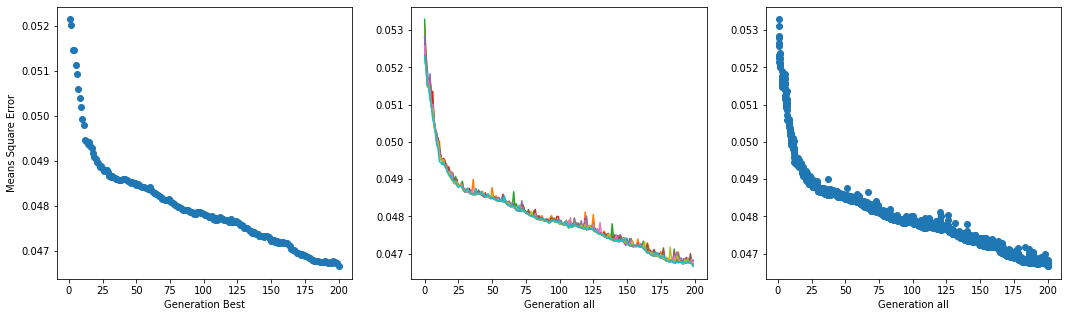

In [56]:
plot(generation_scores, best_scores)

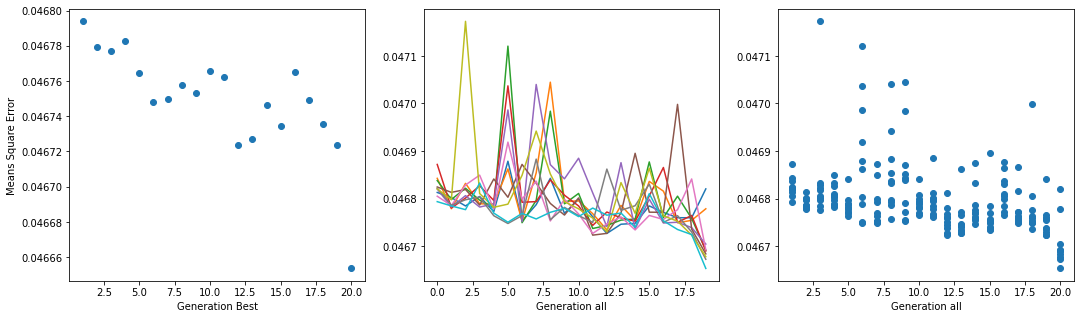

In [57]:
plot(generation_scores[-20:], best_scores[-20:])

In [58]:
# A régi - evolve_adv1

%%time
generation_scores, best_scores, best_mlp = evolve_adv1(mlp_dummy,
                                                       generation = 200,
                                                       print_population=False,
                                                       print_generation=(True, 20), random_factor=500)

best_score in generation i =  0  =  0.05222240259707018
best_score in generation i =  20  =  0.048823117366700336
best_score in generation i =  40  =  0.04839327760567124
best_score in generation i =  60  =  0.04811168190691273
best_score in generation i =  80  =  0.04784238451323842
best_score in generation i =  100  =  0.04755463450386439
best_score in generation i =  120  =  0.047427903601049974
best_score in generation i =  140  =  0.04725381672746706
best_score in generation i =  160  =  0.04701039753487344
best_score in generation i =  180  =  0.04663734973686542
CPU times: user 1.34 s, sys: 11 ms, total: 1.35 s
Wall time: 1.36 s


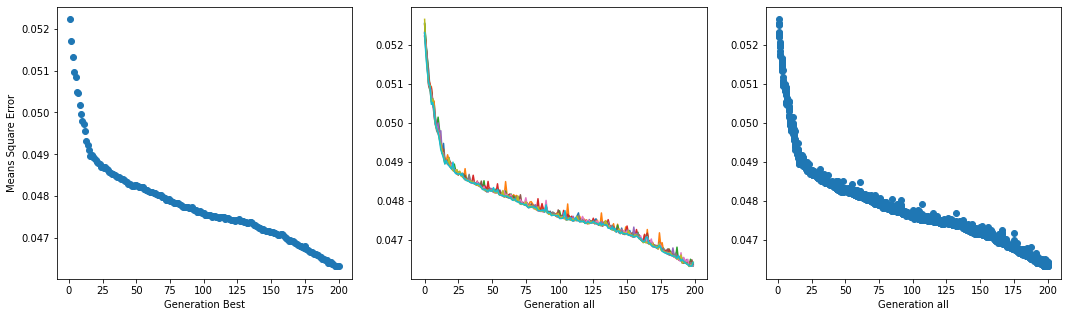

In [59]:
plot(generation_scores, best_scores)

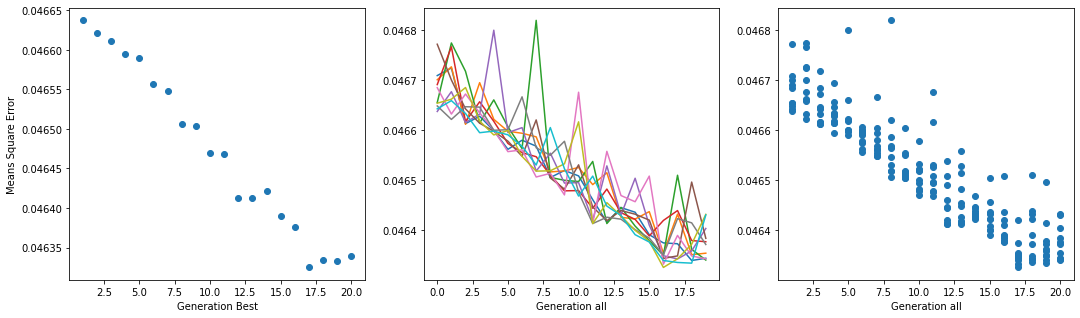

In [60]:
plot(generation_scores[-20:], best_scores[-20:])

In [61]:
# Na most kapcsoljuk be a keep_best = True

%%time
generation_scores, best_scores, best_mlp = evolve_adv2(mlp_dummy,
                                                       generation = 200,
                                                       keep_best = True,
                                                       print_population=False,
                                                       print_generation=(True, 20),
                                                       random_factor=500)



best_score in generation i =  0  =  0.05178198247738859
best_score in generation i =  20  =  0.04867726344300965
best_score in generation i =  40  =  0.04816075136163588
best_score in generation i =  60  =  0.047853945326060465
best_score in generation i =  80  =  0.047501148063838865
best_score in generation i =  100  =  0.0472282494905973
best_score in generation i =  120  =  0.046877134556590636
best_score in generation i =  140  =  0.046555412890775985
best_score in generation i =  160  =  0.04618195912127604
best_score in generation i =  180  =  0.04582616931794229
CPU times: user 1.28 s, sys: 12 ms, total: 1.29 s
Wall time: 1.3 s


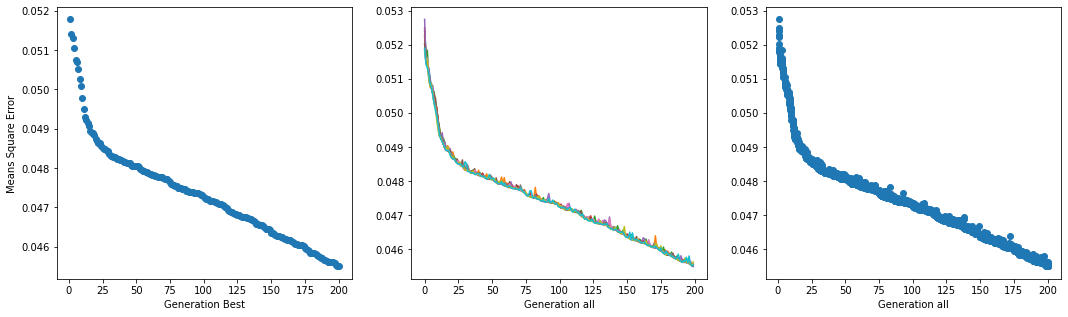

In [62]:
plot(generation_scores, best_scores)

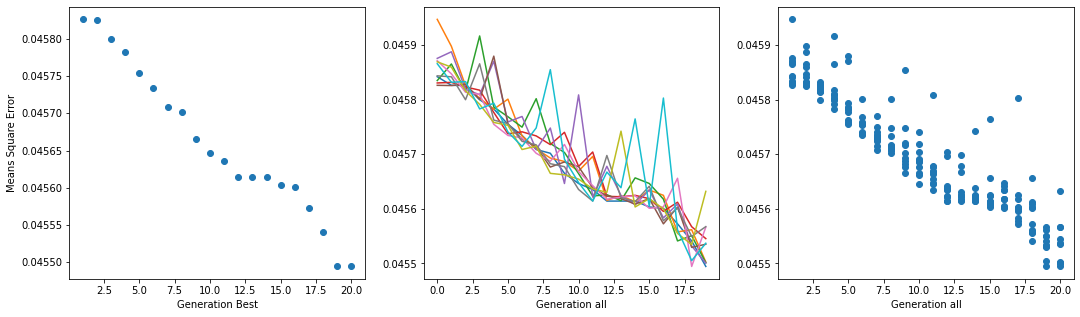

In [63]:
plot(generation_scores[-20:], best_scores[-20:])

# Fent

Bal felül: Mivel a **keep_best** be van kapcsolava, ezért mindíg megtartja a legjobbat és átviszi a következő generációra ezért rosszabb eredményt a következő generációban sem érthet el legfeljebb azonosat.

# Most

Futtassuk meg úgy, hogy nagyobbra veszem a mutációs rátát, **random_factor** és hasonlítsuk össze a két módszert.

In [64]:
# Keep Best --> False

%%time
generation_scores_kb_false, best_scores_kb_false, best_mlp_kb_false = evolve_adv2(mlp_dummy,
                                                       generation = 1000,
                                                       keep_best = False,
                                                       print_population=False,
                                                       print_generation=(True, 200),
                                                       random_factor=100)



best_score in generation i =  0  =  0.051609564191605124
best_score in generation i =  200  =  0.042935132326079685
best_score in generation i =  400  =  0.041168602163665996
best_score in generation i =  600  =  0.03916230315155472
best_score in generation i =  800  =  0.0392785962774473
CPU times: user 6.06 s, sys: 41.1 ms, total: 6.1 s
Wall time: 6.11 s


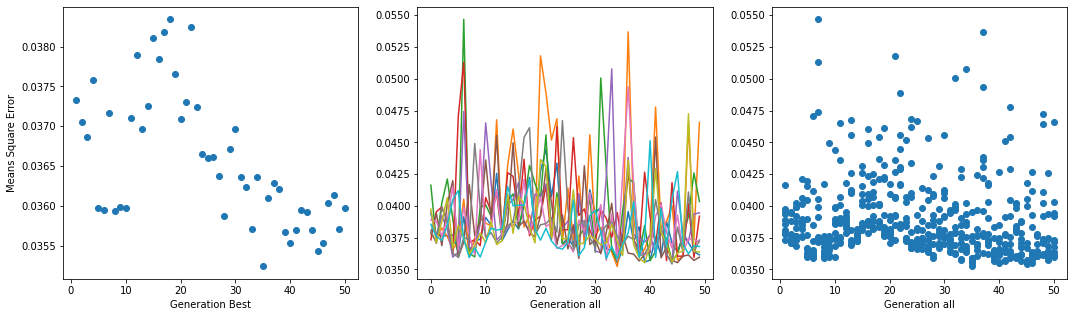

In [65]:
plot(generation_scores_kb_false[-50:], best_scores_kb_false[-50:])

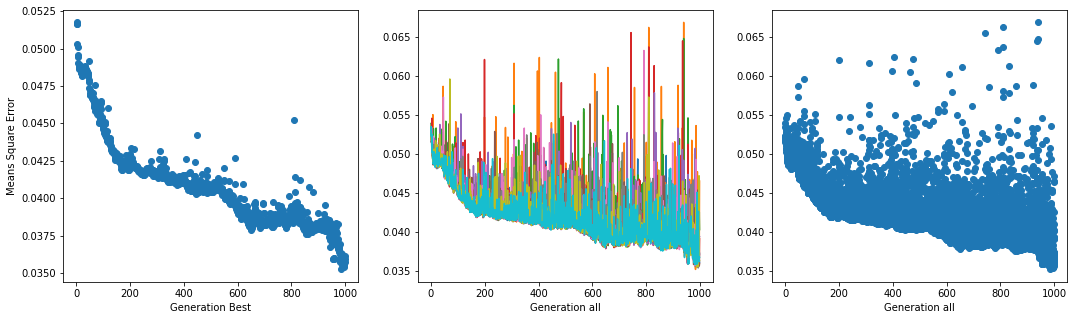

In [66]:
plot(generation_scores_kb_false, best_scores_kb_false)

In [67]:
# Keep Best --> True

%%time
generation_scores_kb_true, best_scores_kb_true, best_mlp_kb_true = evolve_adv2(mlp_dummy,
                                                       generation = 1000,
                                                       keep_best = True,
                                                       print_population=False,
                                                       print_generation=(True, 200),
                                                       random_factor=100)



best_score in generation i =  0  =  0.05214331338639087
best_score in generation i =  200  =  0.04273869176857303
best_score in generation i =  400  =  0.041637165013645505
best_score in generation i =  600  =  0.041234455368070744
best_score in generation i =  800  =  0.04084109284960362
CPU times: user 5 s, sys: 29 ms, total: 5.03 s
Wall time: 5.03 s


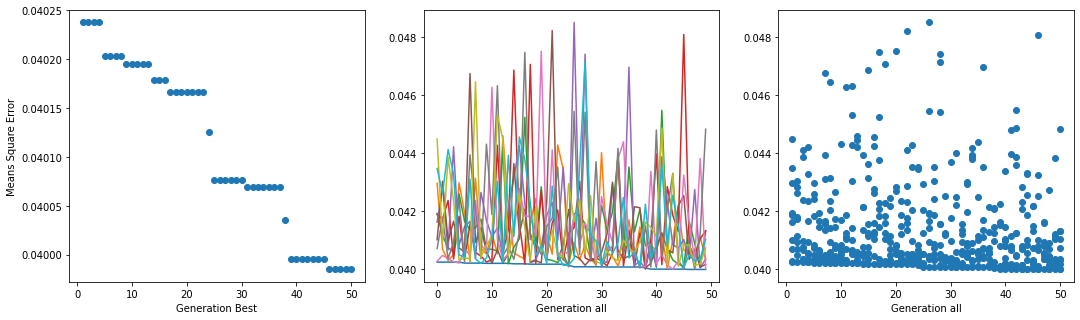

In [68]:
plot(generation_scores_kb_true[-50:], best_scores_kb_true[-50:])

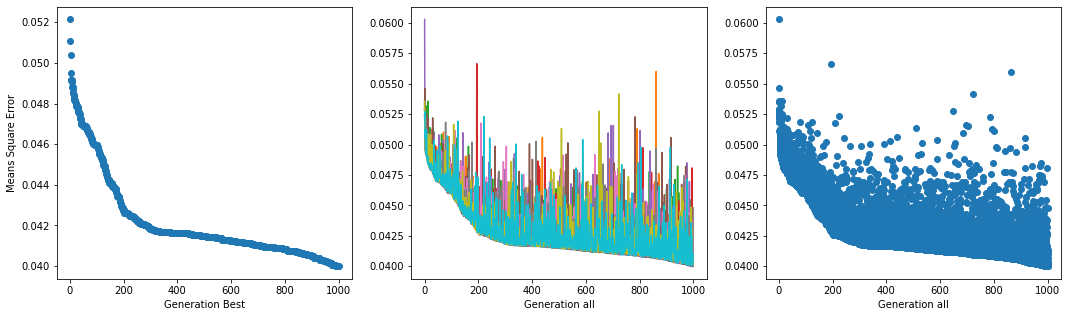

In [69]:
plot(generation_scores_kb_true, best_scores_kb_true)

# Fent

Annyi látszik (jobb oldali ábra) hogy ez még így is iszaonyatosan pazarló. Hiszen a megoldásoknak csak töredéke által jut el egy egy jobb megoldáshoz.

Viszont a **keep_best miatt** nincs visszalépés az egyes generációk között.

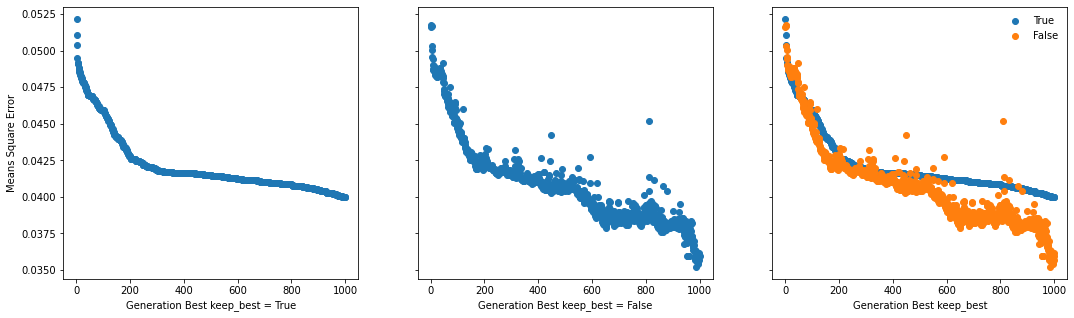

In [70]:
def plot_compare(one, two):
  fig, (a0, a1, a2) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
  _n = len(one)
  _x_axis = np.arange(1, _n+1, 1)

  a0.scatter(_x_axis, one)
  a0.set_ylabel('Means Square Error')
  a0.set_xlabel('Generation Best keep_best = True')

  _n = len(two)
  _x_axis = np.arange(1, _n+1, 1)

  a1.scatter(_x_axis, two)
  a1.set_xlabel('Generation Best keep_best = False')

  a2.scatter(_x_axis, one, label = 'True')
  a2.scatter(_x_axis, two, label = 'False')
  a2.set_xlabel('Generation Best keep_best')
  a2.legend(frameon=False)

  plt.show()

plot_compare(best_scores_kb_true, best_scores_kb_false)

In [71]:
# Keep Best --> False

%%time
generation_scores_kb_false, best_scores_kb_false, best_mlp_kb_false = evolve_adv2(mlp_dummy,
                                                       generation = 5000,
                                                       keep_best = False,
                                                       print_population=False,
                                                       print_generation=(True, 200),
                                                       random_factor=200)



best_score in generation i =  0  =  0.051274317776566554
best_score in generation i =  200  =  0.04318012304959071
best_score in generation i =  400  =  0.0418277306079199
best_score in generation i =  600  =  0.04161059182841194
best_score in generation i =  800  =  0.04158098662134296
best_score in generation i =  1000  =  0.04157486364010746
best_score in generation i =  1200  =  0.04176232372928596
best_score in generation i =  1400  =  0.04147865595946319
best_score in generation i =  1600  =  0.04166156033487604
best_score in generation i =  1800  =  0.041473625147969095
best_score in generation i =  2000  =  0.04095316534428583
best_score in generation i =  2200  =  0.040299788201197576
best_score in generation i =  2400  =  0.0393424801885794
best_score in generation i =  2600  =  0.037452339929285074
best_score in generation i =  2800  =  0.035229906837300685
best_score in generation i =  3000  =  0.03392981656275909
best_score in generation i =  3200  =  0.03176211221451306
b

In [72]:
# Keep Best --> True

%%time
generation_scores_kb_true, best_scores_kb_true, best_mlp_kb_true = evolve_adv2(mlp_dummy,
                                                       generation = 5000,
                                                       keep_best = True,
                                                       print_population=False,
                                                       print_generation=(True, 200),
                                                       random_factor=200)



best_score in generation i =  0  =  0.05162502345394102
best_score in generation i =  200  =  0.04283183952304361
best_score in generation i =  400  =  0.041721978068827464
best_score in generation i =  600  =  0.04138858779730084
best_score in generation i =  800  =  0.040988329342725255
best_score in generation i =  1000  =  0.04025042944095371
best_score in generation i =  1200  =  0.03894492360803534
best_score in generation i =  1400  =  0.03635195412310266
best_score in generation i =  1600  =  0.03414198694497015
best_score in generation i =  1800  =  0.03156572537265309
best_score in generation i =  2000  =  0.030257000257487697
best_score in generation i =  2200  =  0.029325919059796007
best_score in generation i =  2400  =  0.028415729758518048
best_score in generation i =  2600  =  0.027998428043703227
best_score in generation i =  2800  =  0.027382413359055603
best_score in generation i =  3000  =  0.026440266857820163
best_score in generation i =  3200  =  0.02557939850166

In [243]:
plot_compare(best_scores_kb_true, best_scores_kb_false)

score after sgd learning =  0.05238925670809315
score after reset the net =  0.05238925670809315


AttributeError: ignored

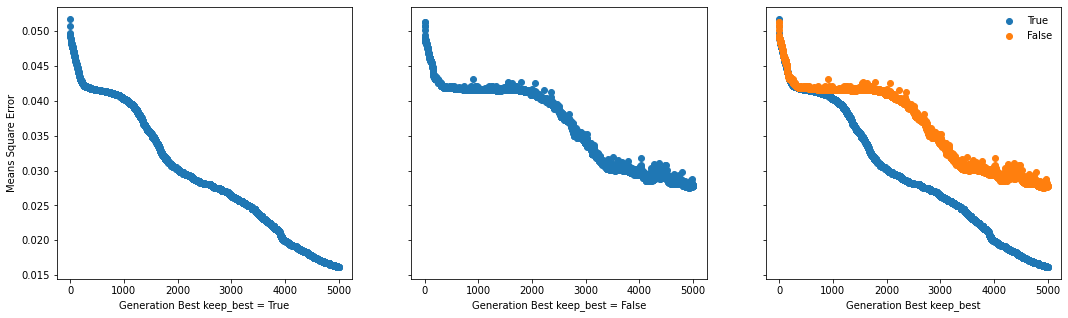

In [74]:
plot_compare(best_scores_kb_true, best_scores_kb_false)

# Nem az összes súlyt mutálja, hanem generációnként egyet véletlenszerűen kiválasztva

Egy nagyon jó magyarázat.

Tulajdonkép a `.copy()` csak egy ujabb pointer listát ad vissza, de a pointerek ugyan azokra az objektumokra mutatnak.

https://stackoverflow.com/questions/2612802/list-changes-unexpectedly-after-assignment-why-is-this-and-how-can-i-prevent-it



In [75]:
#
#
#
#
#
#      Ó, sajonos egy óriási bugot hagytam a programban, amit most ki kell javítanom
#
#
#      sajnos sima copy nem másolja az objektum jelen esetben az mlp_dummy objektum property filedjeit hanem úgy viselkedett mint egy pointer
#      ezért aztán bármilyen műveletet végeztem vele az az eredeti objektumon is végrehajtotta, szóval rossz volt
#
#
#
#
#

In [85]:
# Ez a kis példa mutatja, hogy mi a hiba

tlp_dummy = MLPRegressor((3, ), max_iter=1)
tlp_dummy.fit(_X_indicator, _y)       # << ---- Ez kell a súlyok inicializálásához

a = tlp_dummy.coefs_            # <--------- nem ám leteszi egy változóba
b = a                           # <--------- ez egyértelműen egy pointer ha b-t változtatom változni fog a is, de nem kéne, hogy változzon mlp_dummy.coef_
c = list(a)                     # <--------- ez sem segít, c nem egy új lista lesz, hanem egy nyomorult pointer ami még mindíg mlp_dummy.coef_-re mutat
d = deepcopy(a)                 # <--------- ez az egyetlen amivel egy új listát hozok létre, ami független mlp_dummy.coef_-től

print(id(a), id(b), id(c), id(d))

print(tlp_dummy.coefs_[0][0][0])
print(a[0][0][0])
print(b[0][0][0])
print(c[0][0][0])
print(d[0][0][0])

c[0][0][0] = 0.2                # <--------- felülcsapja a-t, b-t, c-t, ami még rosszabb  tlp_dummy.coefs_ értékét is
d[0][0][0] = 2.4                # <--------- ő viszont nem csap felül semmit

print(id(a), id(b), id(c), id(d))

print(tlp_dummy.coefs_[0][0][0])
print(a[0][0][0])
print(b[0][0][0])
print(c[0][0][0])
print(d[0][0][0])


140705460379968 140705460379968 140705460396752 140705459014784
-1.072457219732684
-1.072457219732684
-1.072457219732684
-1.072457219732684
-1.072457219732684
140705460379968 140705460379968 140705460396752 140705459014784
0.2
0.2
0.2
0.2
2.4


In [86]:
a = 10
b = 10
c = 20

print(id(a))
print(id(b))
print(id(c))

print(hash(a))
print(hash(b))
print(hash(c))

93912065305376
93912065305376
93912065305696
10
10
20


In [87]:
# Kicsit buzerálódok még ezzel mert nagyon zavar

tlp_dummy = MLPRegressor((3, ), max_iter=1)
tlp_dummy.fit(_X_indicator, _y)       # << ---- Ez kell a súlyok inicializálásához

a = tlp_dummy.coefs_            # <--------- nem ám leteszi egy változóba
b = a
c = list(tlp_dummy.coefs_.copy())
d = tlp_dummy.coefs_[:]
e = []
e.extend(tlp_dummy.coefs_)
f = list(tlp_dummy.coefs_)
g = list(tlp_dummy.coefs_.copy())
h = [i for i in tlp_dummy.coefs_]

k = deepcopy(a)                       # <------------ Ez a módszer működik ténylegesen másol

l = tlp_dummy.coefs_[0]               # <------------ Ez még mindíg egy pointer és nem egy új objektum
m = tlp_dummy.coefs_[0].copy()        # <------------ Ez viszont már egy új lista


print(tlp_dummy.coefs_[0][0][0])
print(a[0][0][0])
print(b[0][0][0])
print(c[0][0][0])
print(d[0][0][0])
print(e[0][0][0])
print(f[0][0][0])
print(g[0][0][0])
print(h[0][0][0])
print(k[0][0][0])
print(l[0][0])
print(m[0][0])


c[0][0][0] = 0.2                # <--------- felülcsapja a-t, b-t, c-t, ami még rosszabb  tlp_dummy.coefs_ értékét is
d[0][0][0] = 0.4                # <--------- ő viszont nem csap felül semmit

print(tlp_dummy.coefs_[0][0][0])
print(a[0][0][0])
print(b[0][0][0])
print(c[0][0][0])
print(d[0][0][0])
print(e[0][0][0])
print(f[0][0][0])
print(g[0][0][0])
print(h[0][0][0])
print(k[0][0][0])
print(l[0][0])
print(m[0][0])


0.751671470330277
0.751671470330277
0.751671470330277
0.751671470330277
0.751671470330277
0.751671470330277
0.751671470330277
0.751671470330277
0.751671470330277
0.751671470330277
0.751671470330277
0.751671470330277
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.751671470330277
0.4
0.751671470330277


In [93]:
# Menjünk egy picit tovább, csak a működő megoldásokat hasonlítsuk össze

tlp_dummy = MLPRegressor((3, ), max_iter=1)
tlp_dummy.fit(_X_indicator, _y)       # << ---- Ez kell a súlyok inicializálásához

a = deepcopy(tlp_dummy.coefs_)        # < ----- Lista
b = tlp_dummy.coefs_[0].copy()        # < ----- Numpy.ndarray

print(type(a))
print(type(b))

b[0][0] = 0.9                         # <----- nincs hatással a-ra

print(a[0][0])
print(b[0])

a[0][0][0] = 0.1                      # <----- nincs hatással b-ra

print(a[0][0])
print(b[0])


<class 'list'>
<class 'numpy.ndarray'>
[ 0.52882055 -0.79208    -0.23411167]
[ 0.9        -0.79208    -0.23411167]
[ 0.1        -0.79208    -0.23411167]
[ 0.9        -0.79208    -0.23411167]


In [115]:
%%time

def task_deepcopy():
  a = deepcopy(tlp_dummy.coefs_)        # < ----- Lista
  # print(a[0][0])
  a[0][0][0] = np.random.randn()
  # print(a[0][0])
  return a

task_deepcopy()

CPU times: user 1.07 ms, sys: 4 µs, total: 1.08 ms
Wall time: 5.19 ms


In [116]:
%%time

def task_numpy():
  b = tlp_dummy.coefs_[0].copy()        # < ----- Numpy.ndarray
  # print(b[0])
  b[0][0] = np.random.randn()
  # print(b[0])
  return b

task_numpy()

CPU times: user 1.23 ms, sys: 3 µs, total: 1.23 ms
Wall time: 12 ms


In [137]:
len(tlp_dummy.coefs_)

2

In [142]:
%%time

def task_numpy_full():
  # coefs_ = []
  b0 = tlp_dummy.coefs_[0].copy()        # < ----- Numpy.ndarray
  b1 = tlp_dummy.coefs_[1].copy()        # < ----- Numpy.ndarray
  b0[0][0] = np.random.randn()
  coefs_ = [b0, b1]
  return coefs_

task_numpy_full()

CPU times: user 231 µs, sys: 2 µs, total: 233 µs
Wall time: 1.04 ms


In [151]:
%%time
for i in range(100000):
  task_deepcopy()
print('--- end ---')

--- end ---
CPU times: user 714 ms, sys: 1.95 ms, total: 716 ms
Wall time: 721 ms


In [152]:
%%time
for i in range(100000):
  task_numpy()
print('--- end ---')

--- end ---
CPU times: user 180 ms, sys: 987 µs, total: 181 ms
Wall time: 186 ms


In [153]:
%%time
for i in range(100000):
  task_numpy_full()
print('--- end ---')

--- end ---
CPU times: user 260 ms, sys: 2.98 ms, total: 263 ms
Wall time: 265 ms


# Jó, most hogy láttuk, hogyan kéne ezt megcsinálni

írjuk át a legutolsó kódot és nézzük meg, hogy fut le

In [155]:
# Nagyon kicsit változtatok a súlyokon a generációkon belül, de generációnként nincs öröklés

def randomizer(coefs, random_factor):

  _coefs = coefs.copy()       # <--------------- nem úgy működik ahogy gondoltam, nem hoz létre új példányt hanem pointer
  
  for i in range(len(coefs)):
    _random_disturbance = np.random.randn(coefs[i].shape[0], coefs[i].shape[1]) / random_factor
    _coefs[i] = coefs[i] + _random_disturbance
    # _coefs[i] = coefs[i] # <--- means no change

  return _coefs

def evolve_adv2(mlp_dummy, generation = 10,
                population = 10,
                keep_best = False,
                print_population = True,
                print_generation = (True, 1),
                random_factor = 1000,
                solve = 'bad'):
  
  coefs = mlp_dummy.coefs_    # <--------------- nem úgy működik ahogy gondoltam, nem hoz létre új példányt hanem pointer

  working_mlp = deepcopy(mlp_dummy)

  generation = generation
  population = population

  best_mlp_solution = deepcopy(mlp_dummy)

  generation_holder = []
  best_indiv_holder = []
  best_score_holder = []

  for i in range(generation):

    population_holder = []
    best_indiv_holder = []

    best_score = 999999
    for j in range(population):
      
      if( solve == 'bad' ):
        coefs = best_mlp_solution.coefs_  # <------------------------ igazi szívás, ez ugyanis egy pointer
                                          #                           igy ha a cikluson belül értéket adok a best_mlp_solution.coefs_ nek
                                          #                           akkor következő iterációnál már nem az erdetei értékeket olvasa be
                                          #                           ahogy gondoltam volna, hanem egy már módosított értéket
                                          #
                                          #                           ezáltál --> továbbmegy ez a coef és később felülcsapom
      if( solve == 'good' ):
        coefs = deepcopy(best_mlp_solution.coefs_)

      # --> mutáció indul minden egyes egyed esetében
      if( keep_best == True ):
        if( j == 0):
          # Ha keep_best és első elem a populációban, akor tartsa meg a régi súlyt -> ne randomizáljon
          a = coefs
          pass
        else:
          a = randomizer(coefs, random_factor)            # --> randomizálja a súlyokat
      else:
        a = randomizer(coefs, random_factor)              # --> randomizálja a súlyokat
      # --> vége a súlymutációnak

      working_mlp.coefs_ = a           # --> hozzárendeljük a randomizált súlyokat a hálóhoz

      # számolja ki a becslést
      pred = working_mlp.predict(_X_indicator)

      # mérje vissza a hibát
      score = mean_squared_error(_y, pred)
      if( print_population ):
        print('i = ', i, 'j = ', j, 'score = ', score)

      # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
      if( score < best_score ):
        best_score = score
        best_mlp_solution = deepcopy(working_mlp)
        # print('new best_solution find individual = ', j)
      
      # az éppen aktuális egyed score értékét tegyük el
      population_holder.append(score)

      # -----< population iteráció vége

    # generációnként tároljuk le a legjobb egyed score érétkét
    best_score_holder.append(best_score)

    # nyomonkövetés céljából tegyük le egy adott generáció összes egyedének scorját is
    generation_holder.append(population_holder)

    if( print_generation[0] ):
      if( i % print_generation[1] == 0 ):
        print('best_score in generation i = ', i, ' = ', best_score)

  return generation_holder, best_score_holder, best_mlp_solution


In [167]:

%%time
generation_scores_bad, best_scores_bad, best_mlp_bad = evolve_adv2(mlp_dummy,
                                                       generation = 1500,
                                                       keep_best = True,
                                                       print_population=False,
                                                       print_generation=(True, 200),
                                                       random_factor=100,
                                                       solve='bad')



best_score in generation i =  0  =  0.05121673181890708
best_score in generation i =  200  =  0.04161829384530804
best_score in generation i =  400  =  0.041214276063684024
best_score in generation i =  600  =  0.04064826037835924
best_score in generation i =  800  =  0.03976913983565303
best_score in generation i =  1000  =  0.03757528499451435
best_score in generation i =  1200  =  0.03450998737221096
best_score in generation i =  1400  =  0.03157121944559424
CPU times: user 13.4 s, sys: 46.5 ms, total: 13.4 s
Wall time: 13.9 s


In [168]:

%%time
generation_scores_good, best_scores_good, best_mlp_good = evolve_adv2(mlp_dummy,
                                                          generation = 1500,
                                                          keep_best = True,
                                                          print_population=False,
                                                          print_generation=(True, 100),
                                                          random_factor=200,
                                                          solve='good')



best_score in generation i =  0  =  0.05165888376103824
best_score in generation i =  100  =  0.046091049209499746
best_score in generation i =  200  =  0.04273863338701821
best_score in generation i =  300  =  0.04158580555316689
best_score in generation i =  400  =  0.041320893915566946
best_score in generation i =  500  =  0.041026592425218646
best_score in generation i =  600  =  0.04066618200305719
best_score in generation i =  700  =  0.04022766741200132
best_score in generation i =  800  =  0.03958076757908232
best_score in generation i =  900  =  0.03864336572643697
best_score in generation i =  1000  =  0.037339618866167344
best_score in generation i =  1100  =  0.035947943278539896
best_score in generation i =  1200  =  0.033851254279323874
best_score in generation i =  1300  =  0.03240498415933026
best_score in generation i =  1400  =  0.031124257913720674
CPU times: user 9.47 s, sys: 43.9 ms, total: 9.52 s
Wall time: 9.67 s


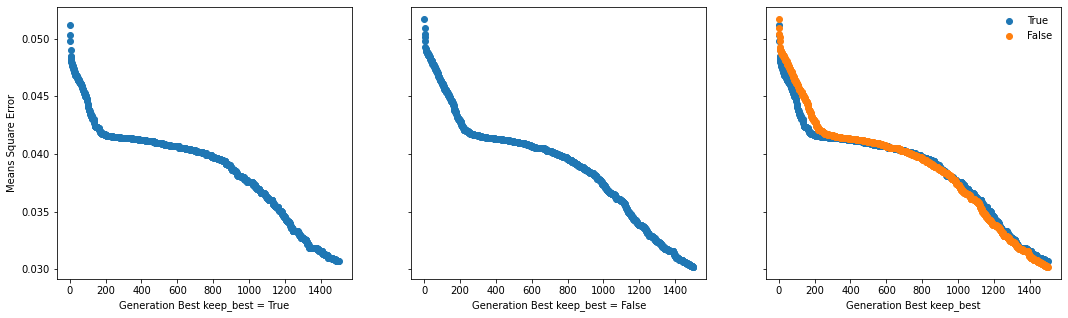

In [169]:
plot_compare(best_scores_bad, best_scores_good)

In [180]:
# Inicializáljuk újra a súlyokat

mlp_dummy = MLPRegressor(hidden_layer_sizes=(3, ), activation='tanh', max_iter = 1)

mlp_dummy.fit(_X_indicator, _y)


MLPRegressor(activation='tanh', hidden_layer_sizes=(3,), max_iter=1)

# Átírtam a kódot ami helytelenül működött



```
# Ami még fontossabb, hogy le is ellenőrzitem mind a négy beállításra

# - keep_best and only_one

# Ez most az ultimate kód.
```



In [227]:

# Nagyon kicsit változtatok a súlyokon a generációkon belül, de generációnként nincs öröklés

def randomizer_adv_redit(coefs, random_factor, only_one, solve):
  if( solve == 'bad' ):
    _coefs = coefs.copy()       # ----> hát ez csak egy pointer sajnos
  if( solve == 'good' ):
    _coefs = deepcopy(coefs)    # ----> ez a jó megoldás, bár költséges

  # Fent.:
  #
  # Elvileg akár ki is lehetne hagyni mivel a paraméterként átadott 'coefs' már a függvény hívásakor deepcopyzva lett

  # ---> meg kéne próbálnom majd egy új numpy tömbbe raknom és minden körben felülcsapnom.

  if( only_one == False ):
    for i in range(len(coefs)):
      _ranodm_stregth = random_factor
      _random_disturbance = np.random.randn(coefs[i].shape[0], coefs[i].shape[1]) / _ranodm_stregth
      _coefs[i] = coefs[i] + _random_disturbance
      # _coefs[i] = coefs[i] # <--- means no change

  if( only_one == True ):
    # ki kell választani a réteget
    _number_of_layers = len(coefs)

    # összesen ennyi rétegünk van
    _random_layer = np.random.randint(low=0, high=_number_of_layers, size=None)

    _row = _coefs[_random_layer].shape[0]
    _col = _coefs[_random_layer].shape[1]

    _random_row = np.random.randint(low = 1, high = _row + 1)    # fontos, hogy low = 1 és high = _row + 1
    _random_col = np.random.randint(low = 1, high = _col + 1)    # fontos, hogy low = 1 és high = _col + 1

    # okép mevan, hogy melyik tömb melyik sorát oszloát kell kiválasztani és mutálni
    _random_disturbance = np.random.randn() / random_factor          # egyetlen egy random számot kérünk
    _selected_weigth_value = _coefs[_random_layer][_random_row -1, _random_col - 1]

    _coefs[_random_layer][_random_row -1, _random_col -1] = _coefs[_random_layer][_random_row -1, _random_col -1] + _random_disturbance

  return _coefs

def evolve_adv_redit(mlp_dummy, generation = 10,
                     population = 10,
                     only_one = False,
                     keep_best = False,
                     print_population = True,
                     print_generation = (True, 1),
                     random_factor = 1000,
                     print_coefs_ = False,
                     solve = 'bad'):
  
  coefs = mlp_dummy.coefs_

  working_mlp = deepcopy(mlp_dummy)

  generation = generation
  population = population

  best_mlp_solution = deepcopy(mlp_dummy)

  generation_holder = []
  best_indiv_holder = []
  best_score_holder = []

  for i in range(generation):

    population_holder = []
    best_indiv_holder = []

    generation_mlp = deepcopy(best_mlp_solution)

    best_score = 999999
    best_individual = 0
    for j in range(population):

      clone_mlp = deepcopy(generation_mlp) # --> elvileg ezzel szavatolom, hogy minen 'j'-ben lekérje

      if( print_coefs_ ):
        print('------------------------------------')
        print('clone_mlp ----> 1')
        print(clone_mlp.coefs_)


      # Fent.:
      #
      # Leellenőriztem, és tényleg az eredeti súlyokat kapja meg.

      coefs = clone_mlp.coefs_ # --> megkapja az éppen legjobb coeficienseit

      # --> mutáció indul minden egyes egyed esetében
      if( keep_best == True ):
        if( j == 0):
          # Ha keep_best és első elem a populációban, akor tartsa meg a régi súlyt és ne randomizáljon
          a = coefs
          # print('---------> 1 egyed a populációban megörökli a súlyt')
          pass
        else:
          a = randomizer_adv_redit(coefs, random_factor, only_one, solve)            # --> randomizálja a súlyokat
      else:
        a = randomizer_adv_redit(coefs, random_factor, only_one, solve)              # --> randomizálja a súlyokat
      # --> vége a súlymutációnak

      clone_mlp.coefs_ = a           # --> hozzárendeljük a randomizált súlyokat a hálóhoz

      # számolja ki a becslést
      pred = clone_mlp.predict(_X_indicator)

      # kis oknyomozás
      if( print_coefs_ ):
        print('------------------------------------')
        print('best_mlp_solution')
        print(best_mlp_solution.coefs_)
        print('\n')
        print('generation_mlp')
        print(generation_mlp.coefs_)
        print('\n')
        print('clone_mlp')
        print(clone_mlp.coefs_)
        print('------------------------------------')

      # mérje vissza a hibát
      score = mean_squared_error(_y, pred)
      if( print_population ):
        print('i = ', i, 'j = ', j, 'score = ', score)

      # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
      if( score < best_score ):
        best_individual = j
        best_score = score
        best_mlp_solution = deepcopy(clone_mlp)
        # print('new best_solution find individual = ', j)
      
      # az éppen aktuális egyed score értékét tegyük el
      population_holder.append(score)

      # -----

    # generációnként tároljuk le a legjobb egyed score érétkét
    best_score_holder.append(best_score)

    # nyomonkövetés céljából tegyük le egy adott generáció összes egyedének scorját is
    generation_holder.append(population_holder)

    if( print_generation[0] ):
      if( i % print_generation[1] == 0 ):
        if( print_coefs_ ) : print('\n\n')
        print('best_score in generation i = ', i, ' = ', best_score)
        if( print_coefs_ ) :print('found in individual j = ', best_individual, '\n\n')

  return generation_holder, best_score_holder, best_mlp_solution


In [228]:

generation_scores_bad, best_scores_bad, best_mlp_bad = evolve_adv_redit(mlp_dummy,
                                                                        generation = 2,
                                                                        population = 10,
                                                                        only_one = True,
                                                                        keep_best = True,
                                                                        print_population = True,
                                                                        print_generation = (True, 1),
                                                                        random_factor = 1000,
                                                                        print_coefs_ = True,
                                                                        solve = 'bad')


------------------------------------
clone_mlp ----> 1
[array([[-1.01259375, -0.53964553,  0.55053935]]), array([[-1.17989207],
       [ 0.35926595],
       [ 1.1488949 ]])]
------------------------------------
best_mlp_solution
[array([[-1.01259375, -0.53964553,  0.55053935]]), array([[-1.17989207],
       [ 0.35926595],
       [ 1.1488949 ]])]


generation_mlp
[array([[-1.01259375, -0.53964553,  0.55053935]]), array([[-1.17989207],
       [ 0.35926595],
       [ 1.1488949 ]])]


clone_mlp
[array([[-1.01259375, -0.53964553,  0.55053935]]), array([[-1.17989207],
       [ 0.35926595],
       [ 1.1488949 ]])]
------------------------------------
i =  0 j =  0 score =  4.602268885130155
------------------------------------
clone_mlp ----> 1
[array([[-1.01259375, -0.53964553,  0.55053935]]), array([[-1.17989207],
       [ 0.35926595],
       [ 1.1488949 ]])]
------------------------------------
best_mlp_solution
[array([[-1.01259375, -0.53964553,  0.55053935]]), array([[-1.17989207],
     

# Ellenőrzés megvolt, egy utolsó futás

In [229]:

generation_scores, best_scores, best_mlp = evolve_adv_redit(mlp_dummy,
                                                            generation = 100,
                                                            population = 10,
                                                            only_one = True,
                                                            keep_best = True,
                                                            print_coefs_ = False,
                                                            print_population = False,
                                                            print_generation = (True, 10),
                                                            random_factor = 1000,
                                                            solve = 'bad')


best_score in generation i =  0  =  4.6015444262321985
best_score in generation i =  10  =  4.573972431094004
best_score in generation i =  20  =  4.543172145858308
best_score in generation i =  30  =  4.506836494010335
best_score in generation i =  40  =  4.4764699238752135
best_score in generation i =  50  =  4.4490905618049315
best_score in generation i =  60  =  4.419788136382063
best_score in generation i =  70  =  4.387918257084087
best_score in generation i =  80  =  4.359542163102646
best_score in generation i =  90  =  4.334877039180854


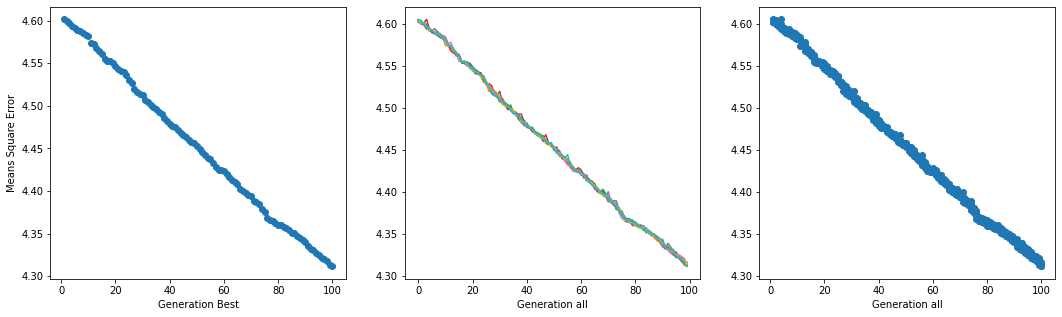

In [230]:
plot(generation_scores, best_scores)

# Bonyolult hálóval

In [304]:
mlp_small = MLPRegressor(hidden_layer_sizes=(20, 5), max_iter=1)

mlp_small.fit(_X_indicator, _y)

MLPRegressor(hidden_layer_sizes=(20, 5), max_iter=1)

In [305]:
# Bonyolult hálóval

%%time

generation_scores, best_scores, best_mlp = evolve_adv_redit(mlp_small,
                                                            generation = 5000,
                                                            population = 10,
                                                            only_one = True,
                                                            keep_best = False,
                                                            print_coefs_ = False,
                                                            print_population = False,
                                                            print_generation = (True, 500),
                                                            random_factor = 10,
                                                            solve = 'bad')


best_score in generation i =  0  =  0.596775174887096
best_score in generation i =  500  =  0.0436918546922363
best_score in generation i =  1000  =  0.03978174816807758
best_score in generation i =  1500  =  0.03346638808516159
best_score in generation i =  2000  =  0.023679112409554857
best_score in generation i =  2500  =  0.019282164424385035
best_score in generation i =  3000  =  0.017132580490601484
best_score in generation i =  3500  =  0.013706552771038459
best_score in generation i =  4000  =  0.00944056321142166
best_score in generation i =  4500  =  0.007916450660232936
CPU times: user 56.8 s, sys: 279 ms, total: 57 s
Wall time: 57.1 s


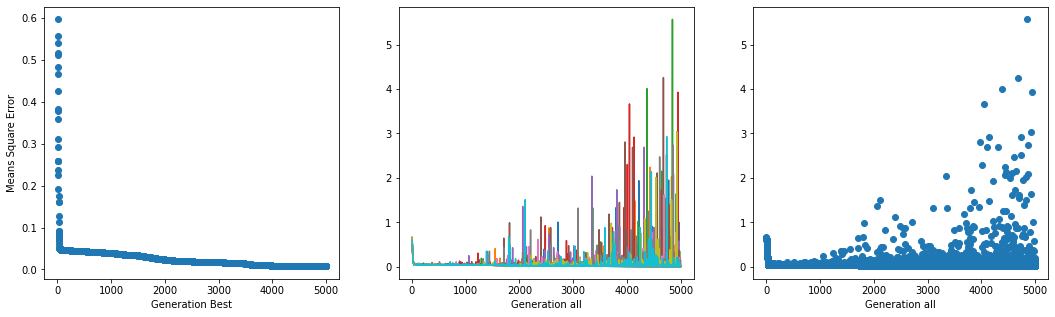

In [306]:
plot(generation_scores, best_scores)

score after sgd learning =  0.05238925670809315
score after reset the net =  0.05238925670809315
score after evolve the net =  0.007269247993111042


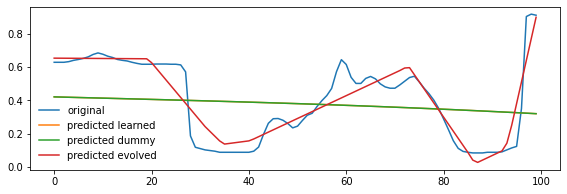

In [307]:
plot_two(mlp, best_mlp)

In [334]:
# mi lenne az adott hálóval elméletileg elérhető maximum

mlp_best_cont = deepcopy(best_mlp)

mlp_best_cont.set_params().warm_start = True
mlp_best_cont.set_params().max_iter = 5000
mlp_best_cont.set_params().n_iter_no_change = 5000
mlp_best_cont.set_params().random_state = 1

mlp_best_cont.get_params()

# tanítsuk tovább a klónozott hálót
mlp_best_cont.fit(_X_indicator, _y)

# csináljuk meg a becslést az ábrázoláshoz
pred_c = mlp_best_cont.predict(_X_indicator)

# csináljuk meg a hiba számítást
score_c = mean_squared_error(_y, pred_c)
print('score after evolve the net = ', score_c)

score after evolve the net =  0.0035110847356210383


score after sgd learning =  0.05238925670809315
score after reset the net =  0.05238925670809315
score after evolve the net =  0.0035110847356210383


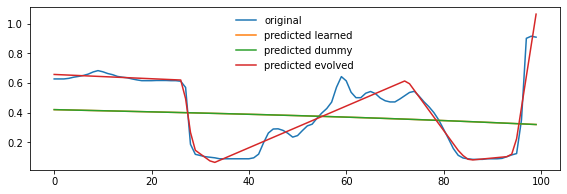

In [335]:
# A GA-val kezdett majd GD-vel folytatott

plot_two(mlp_small, mlp_best_cont)

score after sgd learning =  0.05238925670809315
score after reset the net =  0.05238925670809315
score after evolve the net =  0.007269247993111042


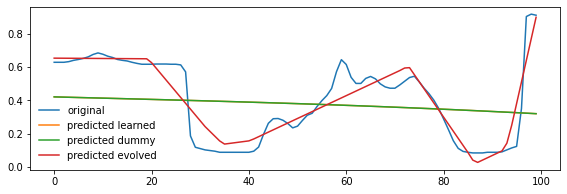

In [320]:
# A GA-val kezdett, és úgy is hagytam nem tanítottam tovább GD-vel

plot_two(mlp_small, best_mlp)

# Mi lenne a maximum amit ebből a hálóból ki lehetne hozni GD-vel?

score after sgd learning =  0.05238925670809315
score after reset the net =  0.05238925670809315
score after evolve the net =  0.004057645812479123


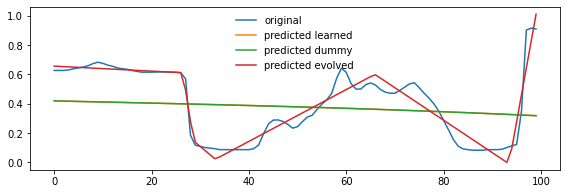

In [339]:
mlp_gd = MLPRegressor(hidden_layer_sizes=(20, 5),
                      max_iter=15000,
                      n_iter_no_change = 15000)

mlp_gd.fit(_X_indicator, _y)

plot_two(mlp_small, mlp_gd)


# Egy fájdalmas kísérlet

Csak, hogy bemutassam mennyire nagy jelentősége van a súlyok kiinduló inicializálásának megtanítom ezt a neurális háló különböző véletlen kiinduló állapotokból és összehasonlítjuk a végén az eredményeket.

Score i =  0   0.03618045918813199
Score i =  1   0.264669010004212
Score i =  2   0.04721940229193915
Score i =  3   0.031621908772382995
Score i =  4   0.035921097998810894
Score i =  5   0.03757717494286923
Score i =  6   0.03350019387234507
Score i =  7   0.39236408241839205
Score i =  8   0.048784480171370805
Score i =  9   0.03384507241887573
-
First score =  0.031621908772382995
Worst score =  0.39236408241839205
-


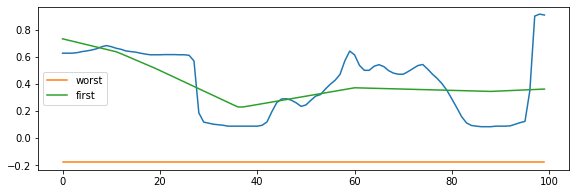

In [345]:
score_holder = []
worst_mlp = None
first_mlp = None
worst_pred = None
first_pred = None
worst_score = 0.0
first_score = 999
for i in range(10):
  _max_iter = 1000
  _random_state = i
  mlp_rand = MLPRegressor(hidden_layer_sizes=(20, 5),
                      max_iter=_max_iter,
                      random_state = i,
                      n_iter_no_change = _max_iter)

  mlp_rand.fit(_X_indicator, _y)
  pred_rand = mlp_rand.predict(_X_indicator)
  score_rand = mean_squared_error(_y, pred_rand)
  tupli = (i, score_rand)
  score_holder.append(tupli)
  print('Score i = ', i, ' ', score_rand)
  if( score_rand > worst_score ):
    worst_score = score_rand
    worst_mlp = deepcopy(mlp_rand)
    worst_pred = pred_rand.copy()
  if( score_rand < first_score ):
    first_score = score_rand
    first_mlp = deepcopy(mlp_rand)
    first_pred = pred_rand.copy()

print('-')
print('First score = ', first_score)
print('Worst score = ', worst_score)
print('-')
plt.figure(figsize=(9.5, 3)); plt.plot(_y); plt.plot(worst_pred, label='worst'); plt.plot(first_pred, label='first'); plt.legend(); plt.show()

# Gondolatok a fent látottakhoz

Elszomorító, hogy ennyire komoly hatással van a kiinduló súlyok inicializációja a tanulás sebességére, nem utolsó sorban pedig a végeredményére.

### A vicc kedvéért ugyan ez csak hosszab tanítással

Score i =  0   0.03521078223016572
Score i =  1   0.06201968283765178
Score i =  2   0.041970889025574866
Score i =  3   0.02407102154901506
Score i =  4   0.03390522366527596
Score i =  5   0.03442208611815395
Score i =  6   0.02546683498955956
Score i =  7   0.07537801769662378
Score i =  8   0.04860481856269902
Score i =  9   0.03003774777818469
-
First score =  0.02407102154901506
Worst score =  0.07537801769662378
-


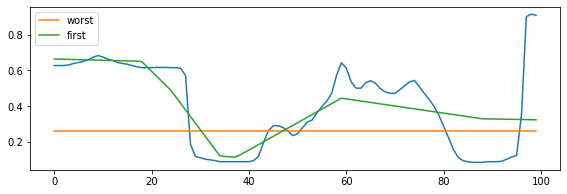

In [346]:
score_holder = []
worst_mlp = None
first_mlp = None
worst_pred = None
first_pred = None
worst_score = 0.0
first_score = 999
for i in range(10):
  _max_iter = 2000
  _random_state = i
  mlp_rand = MLPRegressor(hidden_layer_sizes=(20, 5),
                      max_iter=_max_iter,
                      random_state = i,
                      n_iter_no_change = _max_iter)

  mlp_rand.fit(_X_indicator, _y)
  pred_rand = mlp_rand.predict(_X_indicator)
  score_rand = mean_squared_error(_y, pred_rand)
  tupli = (i, score_rand)
  score_holder.append(tupli)
  print('Score i = ', i, ' ', score_rand)
  if( score_rand > worst_score ):
    worst_score = score_rand
    worst_mlp = deepcopy(mlp_rand)
    worst_pred = pred_rand.copy()
  if( score_rand < first_score ):
    first_score = score_rand
    first_mlp = deepcopy(mlp_rand)
    first_pred = pred_rand.copy()

print('-')
print('First score = ', first_score)
print('Worst score = ', worst_score)
print('-')
plt.figure(figsize=(9.5, 3)); plt.plot(_y); plt.plot(worst_pred, label='worst'); plt.plot(first_pred, label='first'); plt.legend(); plt.show()

In [368]:
er = [a[1] for a in score_holder]

er = [a[1] for a in score_holder if a[1] > 0.04]

er

[0.06201968283765178,
 0.041970889025574866,
 0.07537801769662378,
 0.04860481856269902]

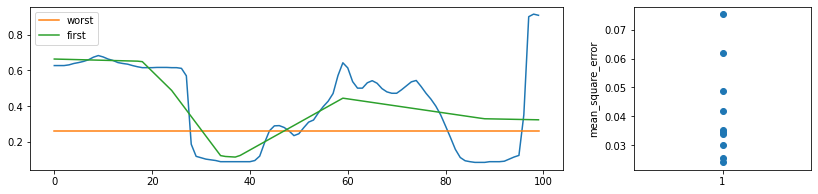

In [373]:
fig, (a0, a1) = plt.subplots(1, 2, figsize=(14, 3), gridspec_kw={'width_ratios': [3, 1]})

a0.plot(_y);
a0.plot(worst_pred, label='worst');
a0.plot(first_pred, label='first');
a0.legend();

a1.scatter(np.ones(len(score_holder)), [a[1] for a in score_holder])
a1.set_ylabel('mean_square_error')
a1.set_xticks([1])
plt.show()


# Csak kíváncsiságból sok GD sok Inivel



In [379]:
score_holder = []
worst_mlp = None
first_mlp = None
worst_pred = None
first_pred = None
worst_score = 0.0
first_score = 999
for i in range(50):
  _max_iter = 2000
  _random_state = i
  mlp_rand = MLPRegressor(hidden_layer_sizes=(20, 5),
                      max_iter=_max_iter,
                      random_state = i,
                      n_iter_no_change = _max_iter)

  mlp_rand.fit(_X_indicator, _y)
  pred_rand = mlp_rand.predict(_X_indicator)
  score_rand = mean_squared_error(_y, pred_rand)
  tupli = (i, score_rand)
  score_holder.append(tupli)
  if( score_rand > worst_score ):
    worst_score = score_rand
    worst_mlp = deepcopy(mlp_rand)
    worst_pred = pred_rand.copy()
    print('Score i = ', i, ' ', score_rand)
  if( score_rand < first_score ):
    first_score = score_rand
    first_mlp = deepcopy(mlp_rand)
    first_pred = pred_rand.copy()
    print('Score i = ', i, ' ', score_rand)

print('-')
print('First score = ', first_score)
print('Worst score = ', worst_score)
print('-')

Score i =  0   0.03521078223016572
Score i =  0   0.03521078223016572
Score i =  1   0.06201968283765178
Score i =  3   0.02407102154901506
Score i =  7   0.07537801769662378
Score i =  10   0.023967807079093927
Score i =  11   0.020984786077218664
Score i =  19   0.015750760150976605
Score i =  22   0.009894057172693677
Score i =  24   0.004300648735841566
-
First score =  0.004300648735841566
Worst score =  0.07537801769662378
-


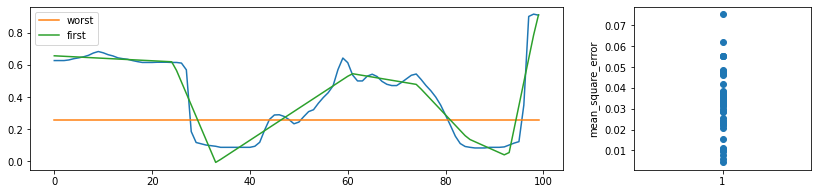

In [380]:
fig, (a0, a1) = plt.subplots(1, 2, figsize=(14, 3), gridspec_kw={'width_ratios': [3, 1]})

a0.plot(_y);
a0.plot(worst_pred, label='worst');
a0.plot(first_pred, label='first');
a0.legend();

a1.scatter(np.ones(len(score_holder)), [a[1] for a in score_holder])
a1.set_ylabel('mean_square_error')
a1.set_xticks([1])
plt.show()


# Tovább gondolási lehetőségek



```
# 1. a random_factor értékét egyedenként, vagy generácionként véletlenszerűen változtatjuk, így néha nagy lenne a mutáció mértéke néha kicsit.

#   - kérdés, hogy így a rendszer gyorsabban konvergál-e
```



# First net

[ 1 20  5  1]


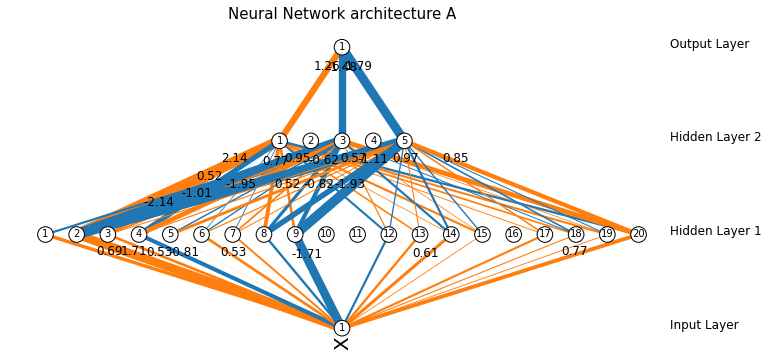

In [382]:
import os

os.system('rm MLPPlot.py')
os.system('wget https://raw.githubusercontent.com/JoDeMiro/Micado-Research/main/MLPPlot.py')

import MLPPlot

num_input_varialbe = ['X']

net = first_mlp

# Define the structure of the network
network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(net.hidden_layer_sizes), [1]))

print(network_structure)

# Draw the Neural Network with weights
network = MLPPlot.DrawNN(network_structure, net.coefs_, num_input_varialbe)
network.draw()

# Worst net

[ 1 20  5  1]


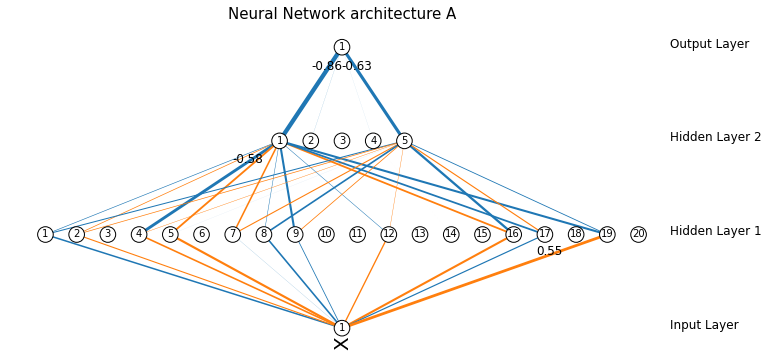

In [384]:
num_input_varialbe = ['X']

net = worst_mlp

# Define the structure of the network
network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(net.hidden_layer_sizes), [1]))

print(network_structure)

# Draw the Neural Network with weights
network = MLPPlot.DrawNN(network_structure, net.coefs_, num_input_varialbe)
network.draw()

# Visualise net

[ 1 10 20  1]


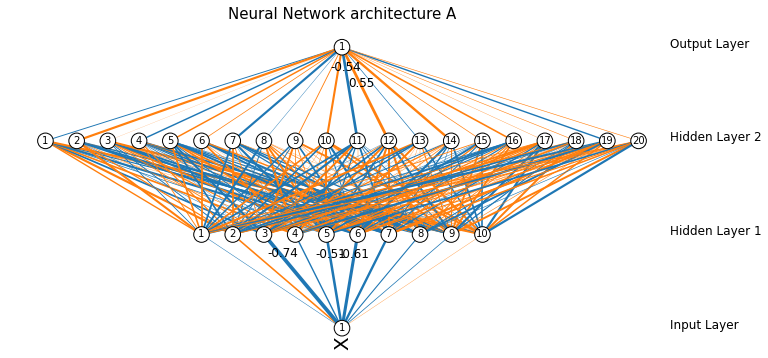

In [381]:
import os

os.system('rm MLPPlot.py')
os.system('wget https://raw.githubusercontent.com/JoDeMiro/Micado-Research/main/MLPPlot.py')

import MLPPlot

num_input_varialbe = ['X']

# Define the structure of the network
network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(mlp.hidden_layer_sizes), [1]))

print(network_structure)

# Draw the Neural Network with weights
network = MLPPlot.DrawNN(network_structure, mlp.coefs_, num_input_varialbe)
network.draw()



```
# JoDeMiro
```

